In [457]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from matplotlib import pyplot
from datetime import datetime
import pylab as py
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
warnings.filterwarnings("ignore")

## Loading the training data

In [409]:
train=pd.read_csv('D:\\Data_sets\\movie\\train.csv')
train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [410]:
train.shape

(3000, 23)

### Additional features:- adding the some additional features which will improve our model accuracy

popularity2, rating, totalVotes

link for additional features:-  

https://www.kaggle.com/kerneler/starter-tmdb-competition-additional-0a390987-e/data?select=TrainAdditionalFeatures.csv
https://www.kaggle.com/kerneler/starter-tmdb-competition-additional-0a390987-e/data?select=TestAdditionalFeatures.csv

In [411]:
train_additionalfeature=pd.read_csv('D:\\Data_sets\\movie\\TrainAdditionalFeatures.csv')

##### Merging the additional features to the train data on the basis of imdb_id

In [412]:
train=pd.merge(train,train_additionalfeature, how='left', on=['imdb_id'])

In [413]:
train.shape

(3000, 26)

## Loading the test data

In [414]:
test=pd.read_csv('D:\\Data_sets\\movie\\test.csv')
test.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."


In [415]:
test.shape

(4398, 22)

In [416]:
test_additionalfeature=pd.read_csv('D:\\Data_sets\\movie\\TestAdditionalFeatures.csv')

##### Merging the additional features to the test data on the basis of imdb_id

In [417]:
test=pd.merge(test,test_additionalfeature, how='left', on=['imdb_id'])

In [418]:
test.shape

(4398, 25)

## Correcting/revising some wrong data in train and test data sets 

link for this :-

https://www.kaggle.com/kamalchhirang/eda-feature-engineering-lgb-xgb-cat#Feature-Engineering-&-Prediction

In [419]:
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 1885,'budget'] = 12             # In the Cut
train.loc[train['id'] == 2091,'budget'] = 10             # Deadfall
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9               # Death at a Funeral
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000

test.loc[test['id'] == 6733,'budget'] = 5000000
test.loc[test['id'] == 3889,'budget'] = 15000000
test.loc[test['id'] == 6683,'budget'] = 50000000
test.loc[test['id'] == 5704,'budget'] = 4300000
test.loc[test['id'] == 6109,'budget'] = 281756
test.loc[test['id'] == 7242,'budget'] = 10000000
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

test.loc[test['release_date'].isnull() == True, 'release_date'] = '01/01/98'

#### Null- values (train)

In [420]:
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
popularity2               118
rating                    118
totalVotes                118
dtype: int64

#### Null- values (test)

In [421]:
test.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                0
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
popularity2               179
rating                    179
totalVotes                179
dtype: int64

In [422]:
# this top variable refers to taking top most categories for any categorical features for onehot encoding on the basis of number
# u can use diffrent value of top any try to chec which is best for your model

top=20

## EDA and Feature Engineering

### 1. id

In [423]:
# dropping the id column as it has no correlation with target column

In [424]:
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

### 2. belongs_to_collection

In [425]:
## checking for the effect on the revenue which has collectin data and which hasn't collection data

In [426]:
def get_dict(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [427]:
def has_collection(df):
    
    has_collection=[]

    for i in df.belongs_to_collection:
        d=get_dict(i)
        if d != {}:
            has_collection.append(1)
        else:
            has_collection.append(0)
    
    df['has_collection']=has_collection

In [428]:
has_collection(train)

In [429]:
has_collection(test)

<AxesSubplot:xlabel='has_collection', ylabel='revenue'>

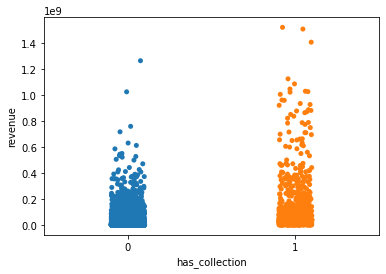

In [430]:
sns.stripplot(x=train.has_collection,y=train.revenue)

In [431]:
## from the above figure we can say that there is some effect on the revenue w.r.t has collection and hasn't collection

In [432]:
# sns.boxplot(x=train.has_collection,y=train.revenue)

In [433]:
## top collections

In [434]:
total_count_collection=[]

for i in train.belongs_to_collection:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_collection.append(j['name'])

In [435]:
## top 20 collection

In [436]:
Counter(total_count_collection).most_common(top)

[('James Bond Collection', 16),
 ('Friday the 13th Collection', 7),
 ('The Pink Panther (Original) Collection', 6),
 ('Police Academy Collection', 5),
 ('Pokémon Collection', 5),
 ('Rocky Collection', 4),
 ('Ice Age Collection', 4),
 ('The Fast and the Furious Collection', 4),
 ('Rambo Collection', 4),
 ('Alien Collection', 4),
 ('Resident Evil Collection', 4),
 ("Child's Play Collection", 4),
 ('Transformers Collection', 4),
 ('Paranormal Activity Collection', 4),
 ('Rush Hour Collection', 3),
 ('Qatsi Collection', 3),
 ('The Jaws Collection', 3),
 ('Diary of a Wimpy Kid Collection', 3),
 ('Missing in Action Collection', 3),
 ('Cars Collection', 3)]

In [437]:
top_collection=[]
for i in Counter(total_count_collection).most_common(top):
    top_collection.append(i[0])

In [438]:
avg=[]

for name in top_collection:
    idx=0
    l=[]
    for i in train.belongs_to_collection:
        d=get_dict(i)
    #     print(d)
        for j in d:
            if j['name']==name:
#                 print(j['name'])
#                 print(train.revenue[idx])
                l.append(train.revenue[idx])
                

        idx+=1
    avg.append(np.mean(l))

Text(0.5, 1.0, 'Average revenue of top collection')

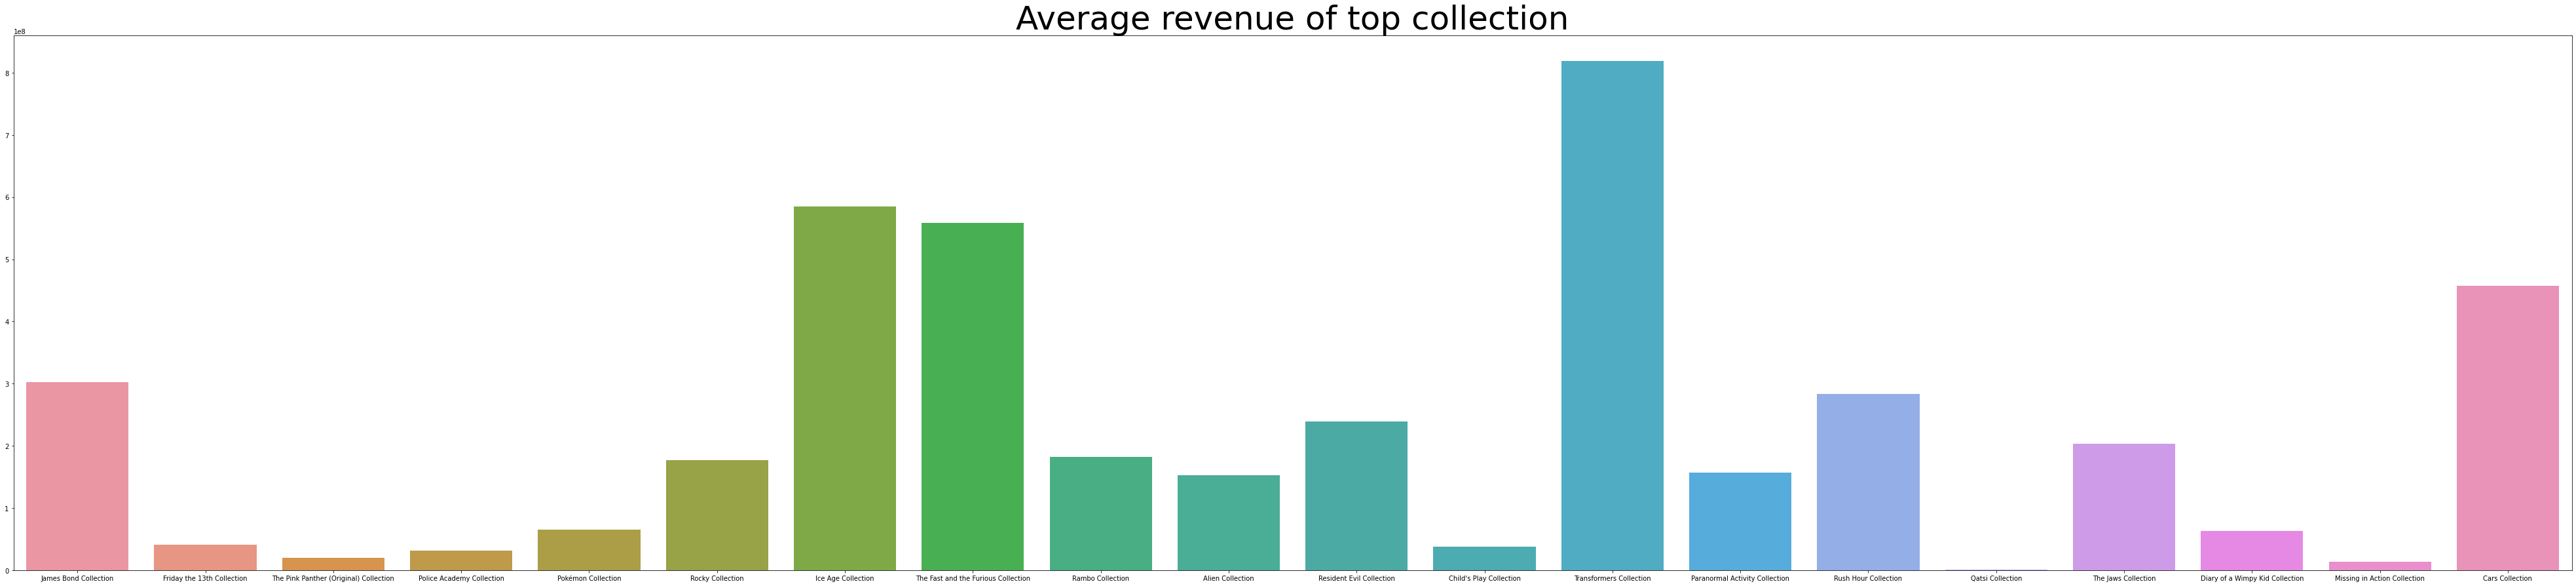

In [439]:
plt.figure(figsize = (70,15))
sns.barplot(x=top_collection,y=avg)
plt.title("Average revenue of top collection", fontsize=50)

In [440]:
## so from the above fig. we can see that the collection has effect on the revenue. so we can use it for our model

In [441]:
top_collection=[]

def top_collections(df):
    
    total_count_collection=[]

    for i in df.belongs_to_collection:
        d=get_dict(i)
        for j in d:
            total_count_collection.append(j['name'])
            
    
    for i in Counter(total_count_collection).most_common(top):
        top_collection.append(i[0])

In [442]:
top_collections(train)

In [443]:
def top_collections_ont_hot_encoding(df):
    
    df['all_coll'] = df['belongs_to_collection'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')
    
    for g in top_collection:
        df['collec_' + g] = df['all_coll'].apply(lambda x: 1 if g in x else 0)

In [444]:
top_collections_ont_hot_encoding(train)

In [445]:
top_collections_ont_hot_encoding(test)

In [446]:
train.drop(['belongs_to_collection','all_coll'], axis=1, inplace=True)
test.drop(['belongs_to_collection','all_coll'], axis=1, inplace=True)

In [447]:
train.shape

(3000, 45)

In [448]:
test.shape

(4398, 44)

In [449]:
train.head(1)

,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,has_collection,collec_James Bond Collection,collec_Friday the 13th Collection,collec_The Pink Panther (Original) Collection,collec_Police Academy Collection,collec_Pokémon Collection,collec_Rocky Collection,collec_Ice Age Collection,collec_The Fast and the Furious Collection,collec_Rambo Collection,collec_Alien Collection,collec_Resident Evil Collection,collec_Child's Play Collection,collec_Transformers Collection,collec_Paranormal Activity Collection,collec_Rush Hour Collection,collec_Qatsi Collection,collec_The Jaws Collection,collec_Diary of a Wimpy Kid Collection,collec_Missing in Action Collection,collec_Cars Collection
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.4,5.0,482.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3. budget

In [450]:
# checking for the null values 

In [451]:
train.budget.isnull().sum()

0

In [452]:
test.budget.isnull().sum()

0

In [453]:
## checking the distribution of budget

Text(0.5, 1.0, 'train Budget distribution')

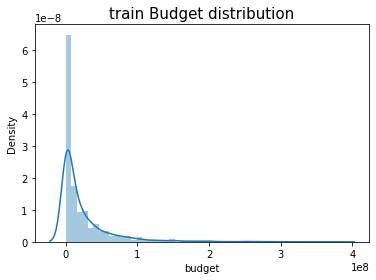

In [454]:
sns.distplot(train.budget, kde=True)
plt.title("train Budget distribution", fontsize=15)

In [52]:
## we can see that the data is +ve skew, so we have to use log transformation to make it normally dist.

Text(0.5, 1.0, 'train budget dist. after transformation')

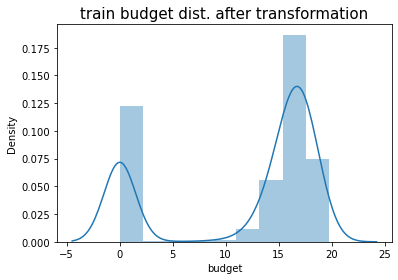

In [53]:
sns.distplot(np.log1p(train.budget), kde=True)
plt.title("train budget dist. after transformation", fontsize=15)

Text(0.5, 1.0, 'test Budget distribution')

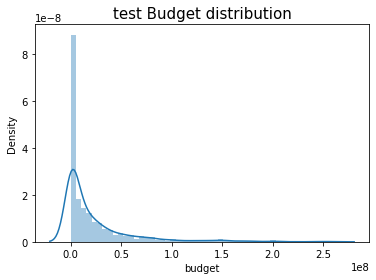

In [54]:
sns.distplot((test.budget), kde=True)
plt.title("test Budget distribution", fontsize=15)

Text(0.5, 1.0, 'test budget dist. after transformation')

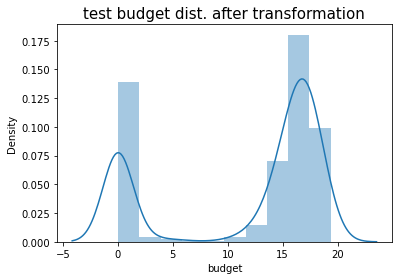

In [55]:
sns.distplot(np.log1p(test.budget), kde=True)
plt.title("test budget dist. after transformation", fontsize=15)

Text(0.5, 1.0, 'budget vs revenue')

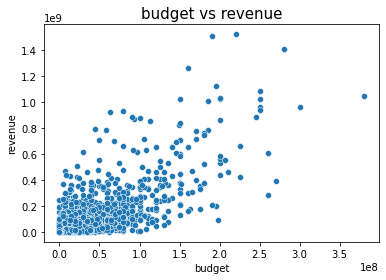

In [56]:
sns.scatterplot(x=train.budget,y=train.revenue)
plt.title("budget vs revenue", fontsize=15)

In [57]:
## from above fig. we can see that with incease in budget, revenue also increases i.e. linear relationship

## 4. genres

In [58]:
## number of genres

In [59]:
def number_of_genre(df):
    
    no_of_genre=[]

    for i in df.genres:
        d=get_dict(i)
        no_of_genre.append(len(d))
        
    df['no_of_genre']=no_of_genre

In [60]:
number_of_genre(train)

In [61]:
number_of_genre(test)

Text(0.5, 1.0, 'count of genre')

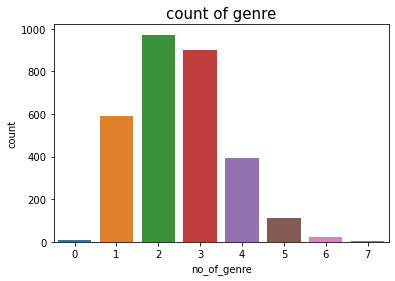

In [62]:
sns.countplot(x=train.no_of_genre)
plt.title("count of genre", fontsize=15)

Text(0.5, 1.0, 'no. of genre vs revenue')

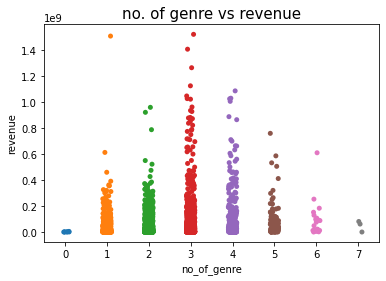

In [63]:
sns.stripplot(x=train.no_of_genre,y=train.revenue)
plt.title("no. of genre vs revenue", fontsize=15)

In [64]:
# from above fig. we can see that there is an effect on number of gerne on the revenue, so we can use this feature for model
# building

In [67]:
# sns.boxplot(x=train.no_of_genre,y=train.revenue)

In [68]:
# top genre

In [69]:
total_count_genre=[]

for i in train.genres:
    d=get_dict(i)
    for j in d:
        total_count_genre.append(j['name'])

In [70]:
## top 20 genres

In [71]:
Counter(total_count_genre).most_common(top)

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

In [72]:
top_genre=[]

def top_genres(df):
    
    total_count_genre=[]

    for i in df.genres:
        d=get_dict(i)
        for j in d:
            total_count_genre.append(j['name'])
            
    for i in Counter(total_count_genre).most_common(top):
        if i[1]>10:                            
            top_genre.append(i[0])
            
    

In [73]:
top_genres(train)

In [74]:
def top_genre_one_hot_encoding(df):
    
    df['all_genres'] = df['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')
    
    for g in top_genre:
        df['genre_' + g] = df['all_genres'].apply(lambda x: 1 if g in x else 0) 

In [75]:
top_genre_one_hot_encoding(train)

In [76]:
top_genre_one_hot_encoding(test)

In [77]:
train.head(1)

,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,has_collection,collec_James Bond Collection,collec_Friday the 13th Collection,collec_The Pink Panther (Original) Collection,collec_Police Academy Collection,collec_Pokémon Collection,collec_Rocky Collection,collec_Ice Age Collection,collec_The Fast and the Furious Collection,collec_Rambo Collection,collec_Alien Collection,collec_Resident Evil Collection,collec_Child's Play Collection,collec_Transformers Collection,collec_Paranormal Activity Collection,collec_Rush Hour Collection,collec_Qatsi Collection,collec_The Jaws Collection,collec_Diary of a Wimpy Kid Collection,collec_Missing in Action Collection,collec_Cars Collection,no_of_genre,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.4,5.0,482.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
train.drop(['genres','all_genres'], axis=1, inplace=True)
test.drop(['genres','all_genres'], axis=1, inplace=True)

In [79]:
train.shape

(3000, 64)

In [80]:
test.shape

(4398, 63)

## 5. homepage

In [81]:
## check for homepage eixsts or not and its effect on revenue

In [82]:
def has_homepage(df):
    
    homepage_exit=[]
    
    for i in df.homepage:
        if str(i)=='nan':
            homepage_exit.append(0)
        else:
            homepage_exit.append(1)
            
    df['homepage_exit']=homepage_exit

In [83]:
has_homepage(train)

In [84]:
has_homepage(test)

Text(0.5, 1.0, 'homepage_exit vs revenue')

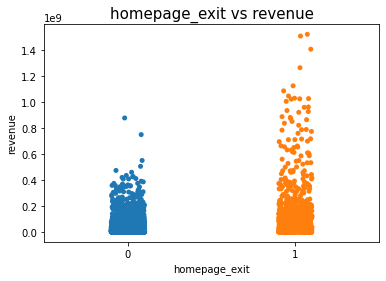

In [85]:
sns.stripplot(train.homepage_exit, train.revenue)
plt.title("homepage_exit vs revenue", fontsize=15)

In [86]:
# from the above fig. we can see that the homepage exists has effect on the revenue

<AxesSubplot:xlabel='homepage_exit', ylabel='revenue'>

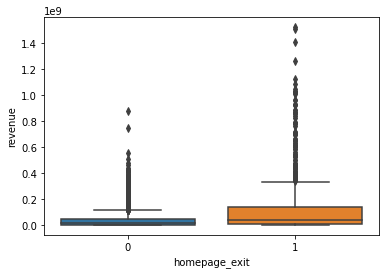

In [87]:
sns.boxplot(train.homepage_exit, train.revenue)

In [88]:
train.drop('homepage', axis=1, inplace=True)
test.drop('homepage', axis=1, inplace=True)

## 6. imdb_id

In [89]:
train.imdb_id

0       tt2637294
1       tt0368933
2       tt2582802
3       tt1821480
4       tt1380152
          ...    
2995    tt0109403
2996    tt2364975
2997    tt0116908
2998    tt0343135
2999    tt1600195
Name: imdb_id, Length: 3000, dtype: object

In [90]:
## dropping this feature as it has no effect on revenue

In [91]:
train.drop('imdb_id', axis=1, inplace=True)
test.drop('imdb_id', axis=1, inplace=True)

## 7. original_language

In [92]:
## checking the original language is english or not

In [93]:
def original_lang_english(df):
    
    orignal_lang_english=[]

    for i in df.original_language:
        if str(i)=='en':
            orignal_lang_english.append(1)
        else:
            orignal_lang_english.append(0)
            
    df['orignal_lang_english']=orignal_lang_english

In [94]:
original_lang_english(train)

In [95]:
original_lang_english(test)

Text(0.5, 1.0, 'original lang english vs revenue')

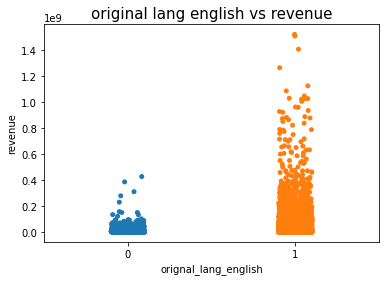

In [96]:
sns.stripplot(x=train.orignal_lang_english,y=train.revenue)
plt.title("original lang english vs revenue", fontsize=15)

In [97]:
## from the above we can see that the there are more count of english language, and also has effect on the revenue as well 
## i.e. high revenue

In [98]:
train.drop('original_language', axis=1, inplace=True)
test.drop('original_language', axis=1, inplace=True)

## 8. original_title

In [99]:
train.original_title

0                         Hot Tub Time Machine 2
1       The Princess Diaries 2: Royal Engagement
2                                       Whiplash
3                                        Kahaani
4                                           마린보이
                          ...                   
2995                                     Chasers
2996                                 Vi är bäst!
2997                     The Long Kiss Goodnight
2998                            Along Came Polly
2999                                   Abduction
Name: original_title, Length: 3000, dtype: object

In [100]:
## since original_title is a combination of string, so in this case we can see the effect of length of original_title on the 
## revenue i.e. by counting the letter or words in the original_title of the movie.

In [101]:
## letter count

In [102]:
train['original_title_letter_count'] = train.original_title.str.len()
test['original_title_letter_count'] = test.original_title.str.len()

Text(0.5, 1.0, 'original_title_letter_count vs revenue')

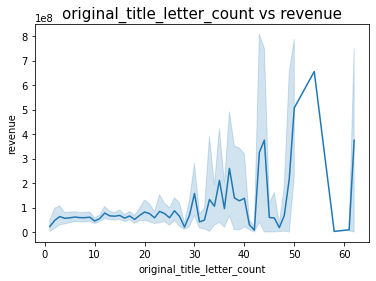

In [103]:
sns.lineplot(x=train.original_title_letter_count,y=train.revenue)
plt.title("original_title_letter_count vs revenue", fontsize=15)

In [104]:
## from the above fig. we can see that there is an effect of letter count on the revenue

In [105]:
## word count

In [106]:
train['original_title_word_count'] = train.original_title.str.split().str.len()
test['original_title_word_count'] = test.original_title.str.split().str.len()

Text(0.5, 1.0, 'original_title_word_count vs revenue')

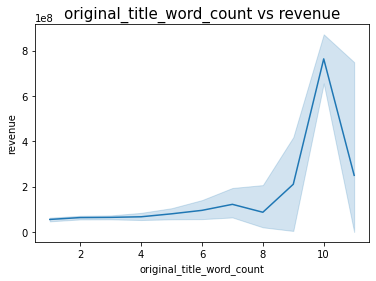

In [107]:
sns.lineplot(x=train.original_title_word_count,y=train.revenue)
plt.title("original_title_word_count vs revenue", fontsize=15)

In [108]:
## ## from the above fig. we can see that there is an effect of word count on the revenue

In [109]:
train.drop('original_title', axis=1, inplace=True)
test.drop('original_title', axis=1, inplace=True)

## 9. overview

In [110]:
train.overview

0       When Lou, who has become the "father of the In...
1       Mia Thermopolis is now a college graduate and ...
2       Under the direction of a ruthless instructor, ...
3       Vidya Bagchi (Vidya Balan) arrives in Kolkata ...
4       Marine Boy is the story of a former national s...
                              ...                        
2995    Military men Rock Reilly and Eddie Devane are ...
2996    Three girls in 1980s Stockholm decide to form ...
2997    Samantha Caine, suburban homemaker, is the ide...
2998    Reuben Feffer is a guy who's spent his entire ...
2999    A young man sets out to uncover the truth abou...
Name: overview, Length: 3000, dtype: object

In [111]:
## checking the effect of word count in overview

In [112]:
train['overview_word_count'] = train.overview.str.split().str.len()
test['overview_word_count'] = test.overview.str.split().str.len()

Text(0.5, 1.0, 'overview_word_count vs revenue')

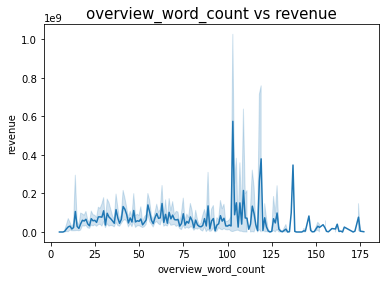

In [113]:
sns.lineplot(x=train.overview_word_count,y=train.revenue)
plt.title("overview_word_count vs revenue", fontsize=15)

In [114]:
## from the above fig. we can see that the word count b/w 100-140 has high revenue

In [115]:
train.drop('overview', axis=1, inplace=True)
test.drop('overview', axis=1, inplace=True)

In [116]:
## 10. popularity

In [117]:
train.popularity

0        6.575393
1        8.248895
2       64.299990
3        3.174936
4        1.148070
          ...    
2995     9.853270
2996     3.727996
2997    14.482345
2998    15.725542
2999    10.512109
Name: popularity, Length: 3000, dtype: float64

In [118]:
## cheking the distribution of data

Text(0.5, 1.0, 'popularity distribution')

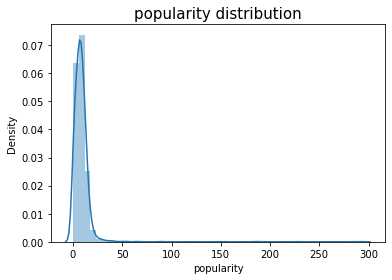

In [119]:
sns.distplot(train.popularity, kde=True)
plt.title("popularity distribution", fontsize=15)

In [120]:
## we can see that the data is +ve skew, so we have to use log transformation to make it normally dist.

Text(0.5, 1.0, 'popularity distribution after transformation')

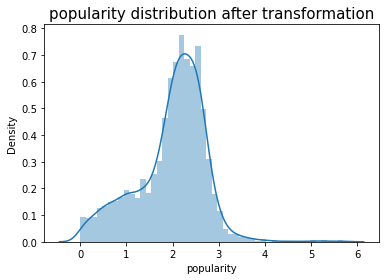

In [121]:
sns.distplot(np.log1p(train.popularity), kde=True)
plt.title("popularity distribution after transformation", fontsize=15)

Text(0.5, 1.0, 'popularity vs revenue')

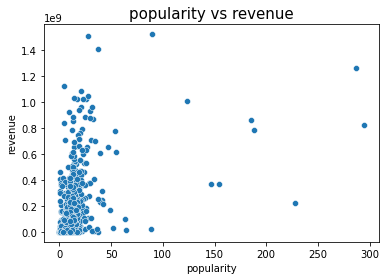

In [122]:
sns.scatterplot(x=train.popularity,y=train.revenue)
plt.title("popularity vs revenue", fontsize=15)

## 11. poster_path

In [123]:
train.poster_path

0       /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg
1       /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg
2       /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg
3       /aTXRaPrWSinhcmCrcfJK17urp3F.jpg
4       /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg
                      ...               
2995    /j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg
2996    /sS01LSy6KDrCZAhtkO18UdnWFT1.jpg
2997    /4MENR8x6mYqnZvp2hGjSaPJz64J.jpg
2998    /nIY4kvJTTnxoBR0wycrXng5MOYs.jpg
2999    /cUT6NQP5LAJpmUoStGtXmvNt4zA.jpg
Name: poster_path, Length: 3000, dtype: object

In [124]:
## dropping the poster_path

In [125]:
train.drop('poster_path', axis=1, inplace=True)
test.drop('poster_path', axis=1, inplace=True)

## 12. production_companies

In [126]:
## number of production_companies & its effect on revenue

In [127]:
def number_of_production_comp(df):
    
    no_of_prod_comp=[]

    for i in df.production_companies:
        d=get_dict(i)

        no_of_prod_comp.append(len(d))
        
    df['no_of_prod_comp']=no_of_prod_comp

In [128]:
number_of_production_comp(train)

In [129]:
number_of_production_comp(test)

Text(0.5, 1.0, 'count of number of prod. company')

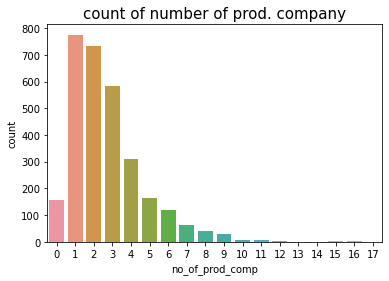

In [130]:
sns.countplot(train.no_of_prod_comp)
plt.title("count of number of prod. company", fontsize=15)

In [131]:
train.head(1)

,budget,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,has_collection,collec_James Bond Collection,collec_Friday the 13th Collection,collec_The Pink Panther (Original) Collection,collec_Police Academy Collection,collec_Pokémon Collection,collec_Rocky Collection,collec_Ice Age Collection,collec_The Fast and the Furious Collection,collec_Rambo Collection,collec_Alien Collection,collec_Resident Evil Collection,collec_Child's Play Collection,collec_Transformers Collection,collec_Paranormal Activity Collection,collec_Rush Hour Collection,collec_Qatsi Collection,collec_The Jaws Collection,collec_Diary of a Wimpy Kid Collection,collec_Missing in Action Collection,collec_Cars Collection,no_of_genre,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,homepage_exit,orignal_lang_english,original_title_letter_count,original_title_word_count,overview_word_count,no_of_prod_comp
0,14000000,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.4,5.0,482.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,22,5,29.0,3


In [132]:
train.no_of_prod_comp.value_counts()

1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
10      7
11      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: no_of_prod_comp, dtype: int64

Text(0.5, 1.0, 'no. of genre vs revenue')

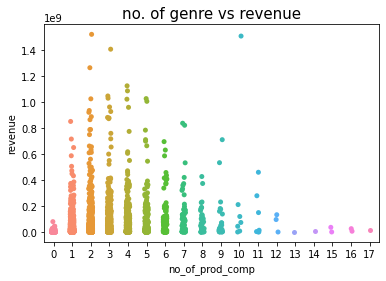

In [133]:
sns.stripplot(x=train.no_of_prod_comp,y=train.revenue)
plt.title("no. of genre vs revenue", fontsize=15)

In [134]:
## top production companies

In [135]:
total_count_prod_comp=[]

for i in train.production_companies:
    d=get_dict(i)
    for j in d:
        total_count_prod_comp.append(j['name'])

In [136]:
## top 20 production_companies

In [137]:
Counter(total_count_prod_comp).most_common(top)

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30)]

In [138]:
top_production_comp=[]
for i in Counter(total_count_prod_comp).most_common(top):
    top_production_comp.append(i[0])

In [139]:
avg=[]

for name in top_production_comp:
    idx=0
    l=[]
    for i in train.production_companies:
        d=get_dict(i)
    #     print(d)
        for j in d:
            if j['name']==name:
#                 print(j['name'])
#                 print(train.revenue[idx])
                l.append(train.revenue[idx])
#                 print(idx)
                

        idx+=1
#     print(l)
    avg.append(np.mean(l))

Text(0.5, 1.0, 'Average revenue of top production company')

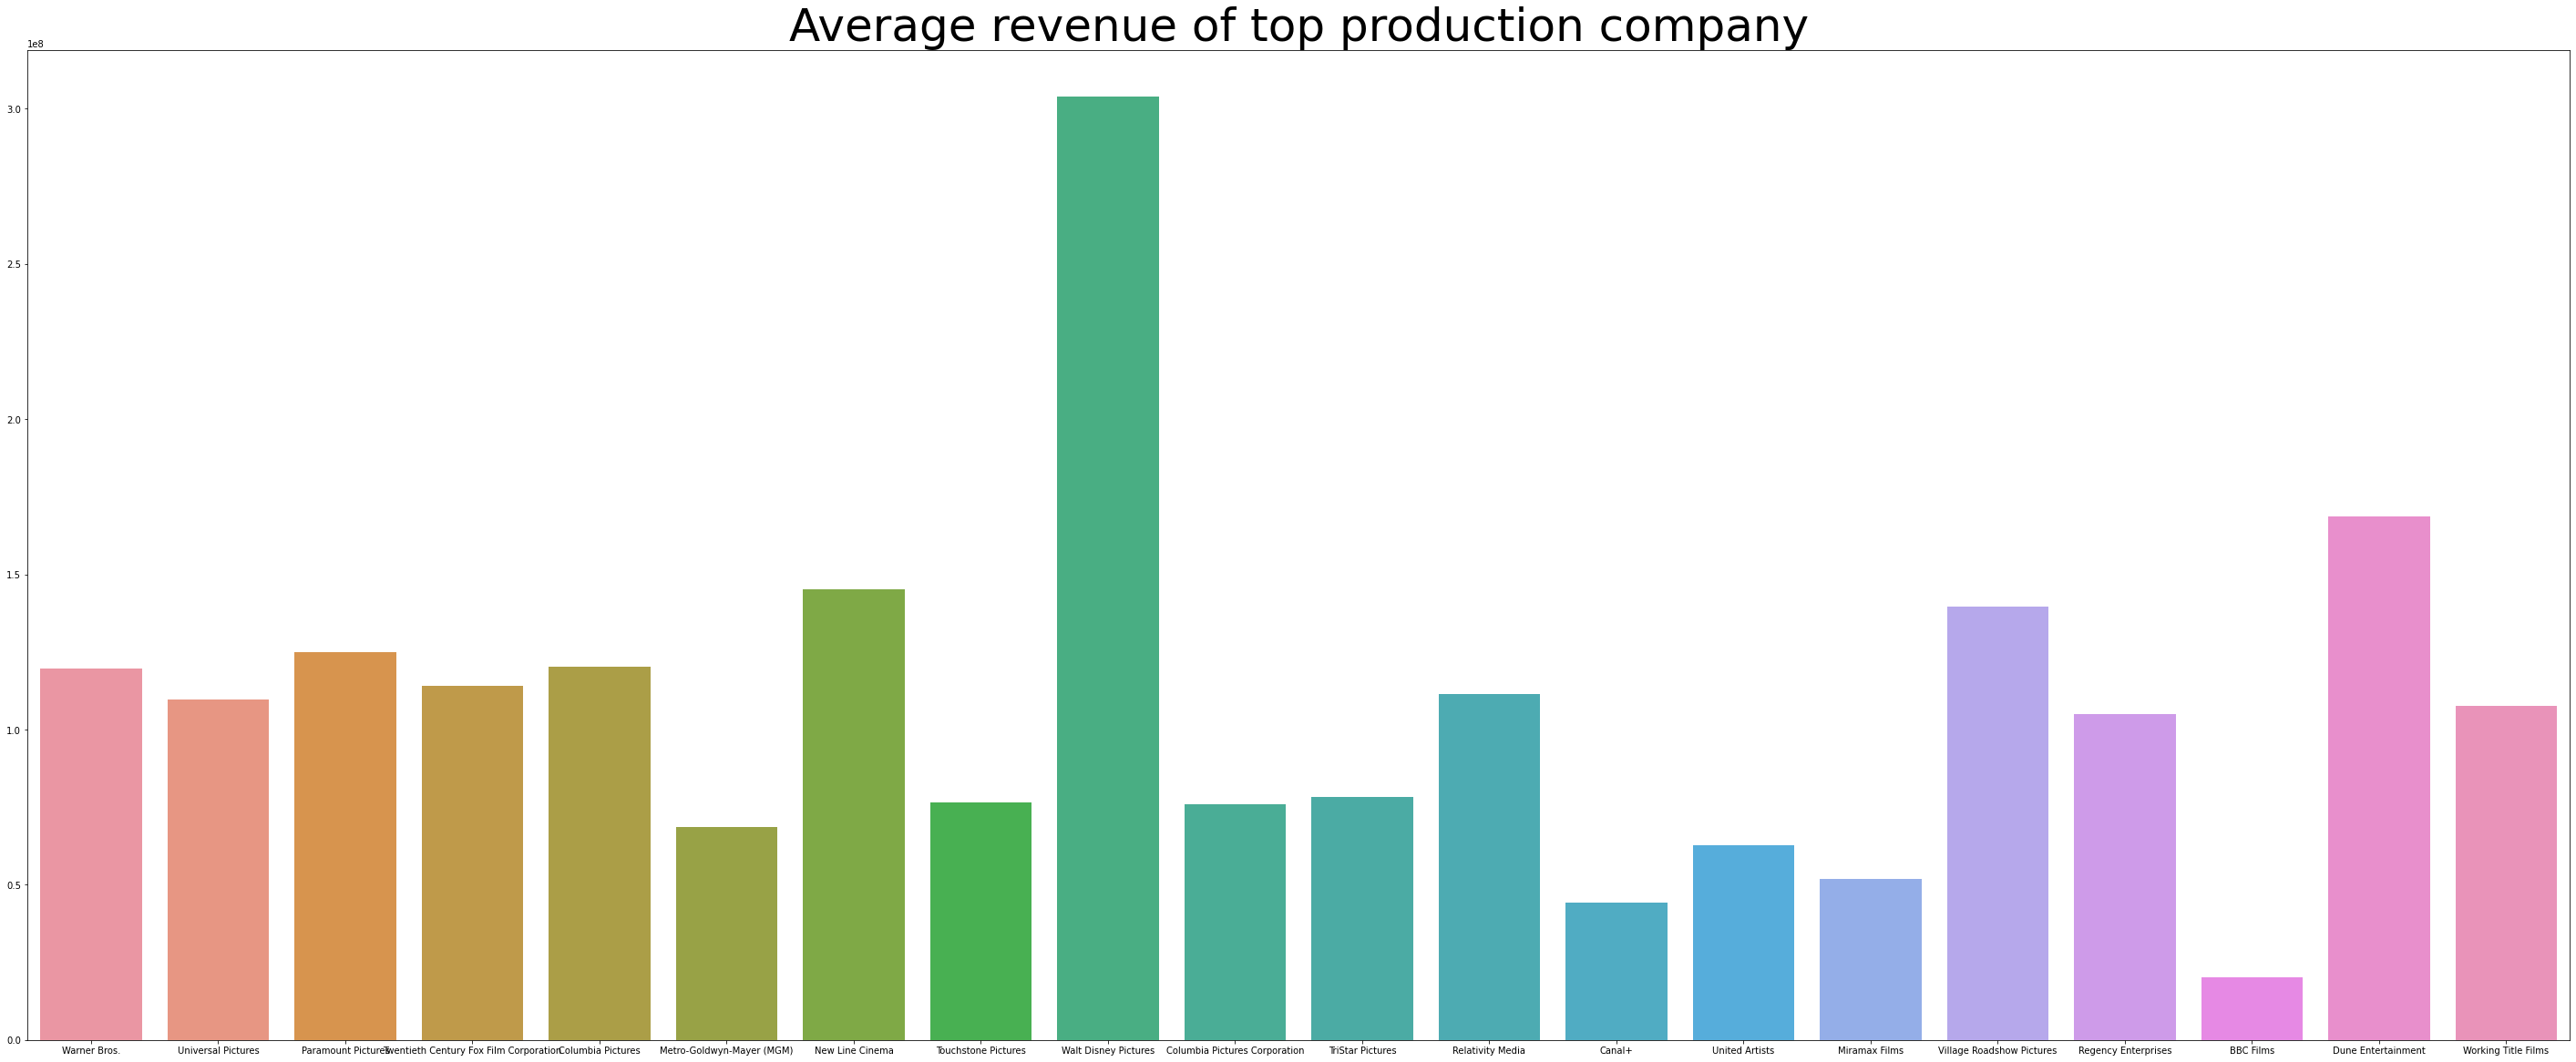

In [140]:
plt.figure(figsize = (50,20))
sns.barplot(x=top_production_comp,y=avg)
plt.title("Average revenue of top production company", fontsize=50)

In [141]:
top_production_comp=[]

def top_prod_companies(df):
    
    total_count_prod_comp=[]

    for i in train.production_companies:
        d=get_dict(i)
        for j in d:
            total_count_prod_comp.append(j['name'])
            
    for i in Counter(total_count_prod_comp).most_common(top):
        if i[1]>10:    ## taking the production_companies which has frequency count > 10
            top_production_comp.append(i[0])
            
    

In [142]:
top_prod_companies(train)

In [143]:
def top_prod_companies_one_hot_encoding(df):
    
    df['all_prod_comp'] = df['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')
    
    for i in top_production_comp:
        df['prod_comp_' + i] = df['all_prod_comp'].apply(lambda x: 1 if i in x else 0)

In [144]:
top_prod_companies_one_hot_encoding(train)

In [145]:
top_prod_companies_one_hot_encoding(test)

In [146]:
train.head(1)

,budget,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,has_collection,collec_James Bond Collection,collec_Friday the 13th Collection,collec_The Pink Panther (Original) Collection,collec_Police Academy Collection,collec_Pokémon Collection,collec_Rocky Collection,collec_Ice Age Collection,collec_The Fast and the Furious Collection,collec_Rambo Collection,collec_Alien Collection,collec_Resident Evil Collection,collec_Child's Play Collection,collec_Transformers Collection,collec_Paranormal Activity Collection,collec_Rush Hour Collection,collec_Qatsi Collection,collec_The Jaws Collection,collec_Diary of a Wimpy Kid Collection,collec_Missing in Action Collection,collec_Cars Collection,no_of_genre,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,homepage_exit,orignal_lang_english,original_title_letter_count,original_title_word_count,overview_word_count,no_of_prod_comp,all_prod_comp,prod_comp_Warner Bros.,prod_comp_Universal Pictures,prod_comp_Paramount Pictures,prod_comp_Twentieth Century Fox Film Corporation,prod_comp_Columbia Pictures,prod_comp_Metro-Goldwyn-Mayer (MGM),prod_comp_New Line Cinema,prod_comp_Touchstone Pictures,prod_comp_Walt Disney Pictures,prod_comp_Columbia Pictures Corporation,prod_comp_TriStar Pictures,prod_comp_Relativity Media,prod_comp_Canal+,prod_comp_United Artists,prod_comp_Miramax Films,prod_comp_Village Roadshow Pictures,prod_comp_Regency Enterprises,prod_comp_BBC Films,prod_comp_Dune Entertainment,prod_comp_Working Title Films
0,14000000,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.4,5.0,482.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,22,5,29.0,3,Metro-Goldwyn-Mayer (MGM) Paramount Pictures U...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [147]:
train.drop(['production_companies','all_prod_comp'], axis=1, inplace=True)
test.drop(['production_companies','all_prod_comp'], axis=1, inplace=True)

In [148]:
train.shape

(3000, 83)

In [149]:
test.shape

(4398, 82)

## 13. production_countries

In [150]:
## number of production_countries & its effect on revenue

In [151]:
def number_of_production_country(df):
    
    no_prod_countries=[]

    for i in df.production_countries:
        d=get_dict(i)

        no_prod_countries.append(len(d))
        
    df['no_prod_countries']=no_prod_countries

In [152]:
number_of_production_country(train)

In [153]:
number_of_production_country(test)

Text(0.5, 1.0, 'count of number of prod. country')

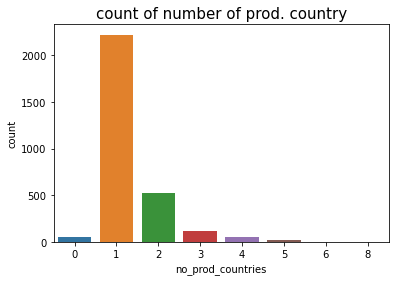

In [154]:
sns.countplot(train.no_prod_countries)
plt.title("count of number of prod. country", fontsize=15)

Text(0.5, 1.0, 'no. of genre vs revenue')

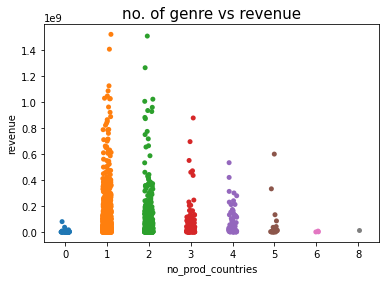

In [155]:
sns.stripplot(x=train.no_prod_countries,y=train.revenue)
plt.title("no. of genre vs revenue", fontsize=15)

In [156]:
## top production country

In [157]:
total_count_prod_country=[]

for i in train.production_countries:
    d=get_dict(i)
    for j in d:
        total_count_prod_country.append(j['iso_3166_1'])

In [158]:
## top 20 production_countries

In [159]:
Counter(total_count_prod_country).most_common(top)

[('US', 2282),
 ('GB', 380),
 ('FR', 222),
 ('DE', 167),
 ('CA', 120),
 ('IN', 81),
 ('IT', 64),
 ('JP', 61),
 ('AU', 61),
 ('RU', 58),
 ('ES', 54),
 ('CN', 42),
 ('HK', 42),
 ('IE', 23),
 ('BE', 23),
 ('KR', 22),
 ('MX', 19),
 ('SE', 18),
 ('NZ', 17),
 ('NL', 15)]

In [160]:
top_production_country=[]
for i in Counter(total_count_prod_country).most_common(top):
    top_production_country.append(i[0])

In [161]:
avg=[]

for name in top_production_country:
    idx=0
    l=[]
    for i in train.production_countries:
        d=get_dict(i)
    #     print(d)
        for j in d:
            if j['iso_3166_1']==name:
#                 print(j['name'])
#                 print(train.revenue[idx])
                l.append(train.revenue[idx])
#                 print(idx)
                

        idx+=1
#     print(len(l))
    avg.append(np.mean(l))

Text(0.5, 1.0, 'Average revenue of top production countries.')

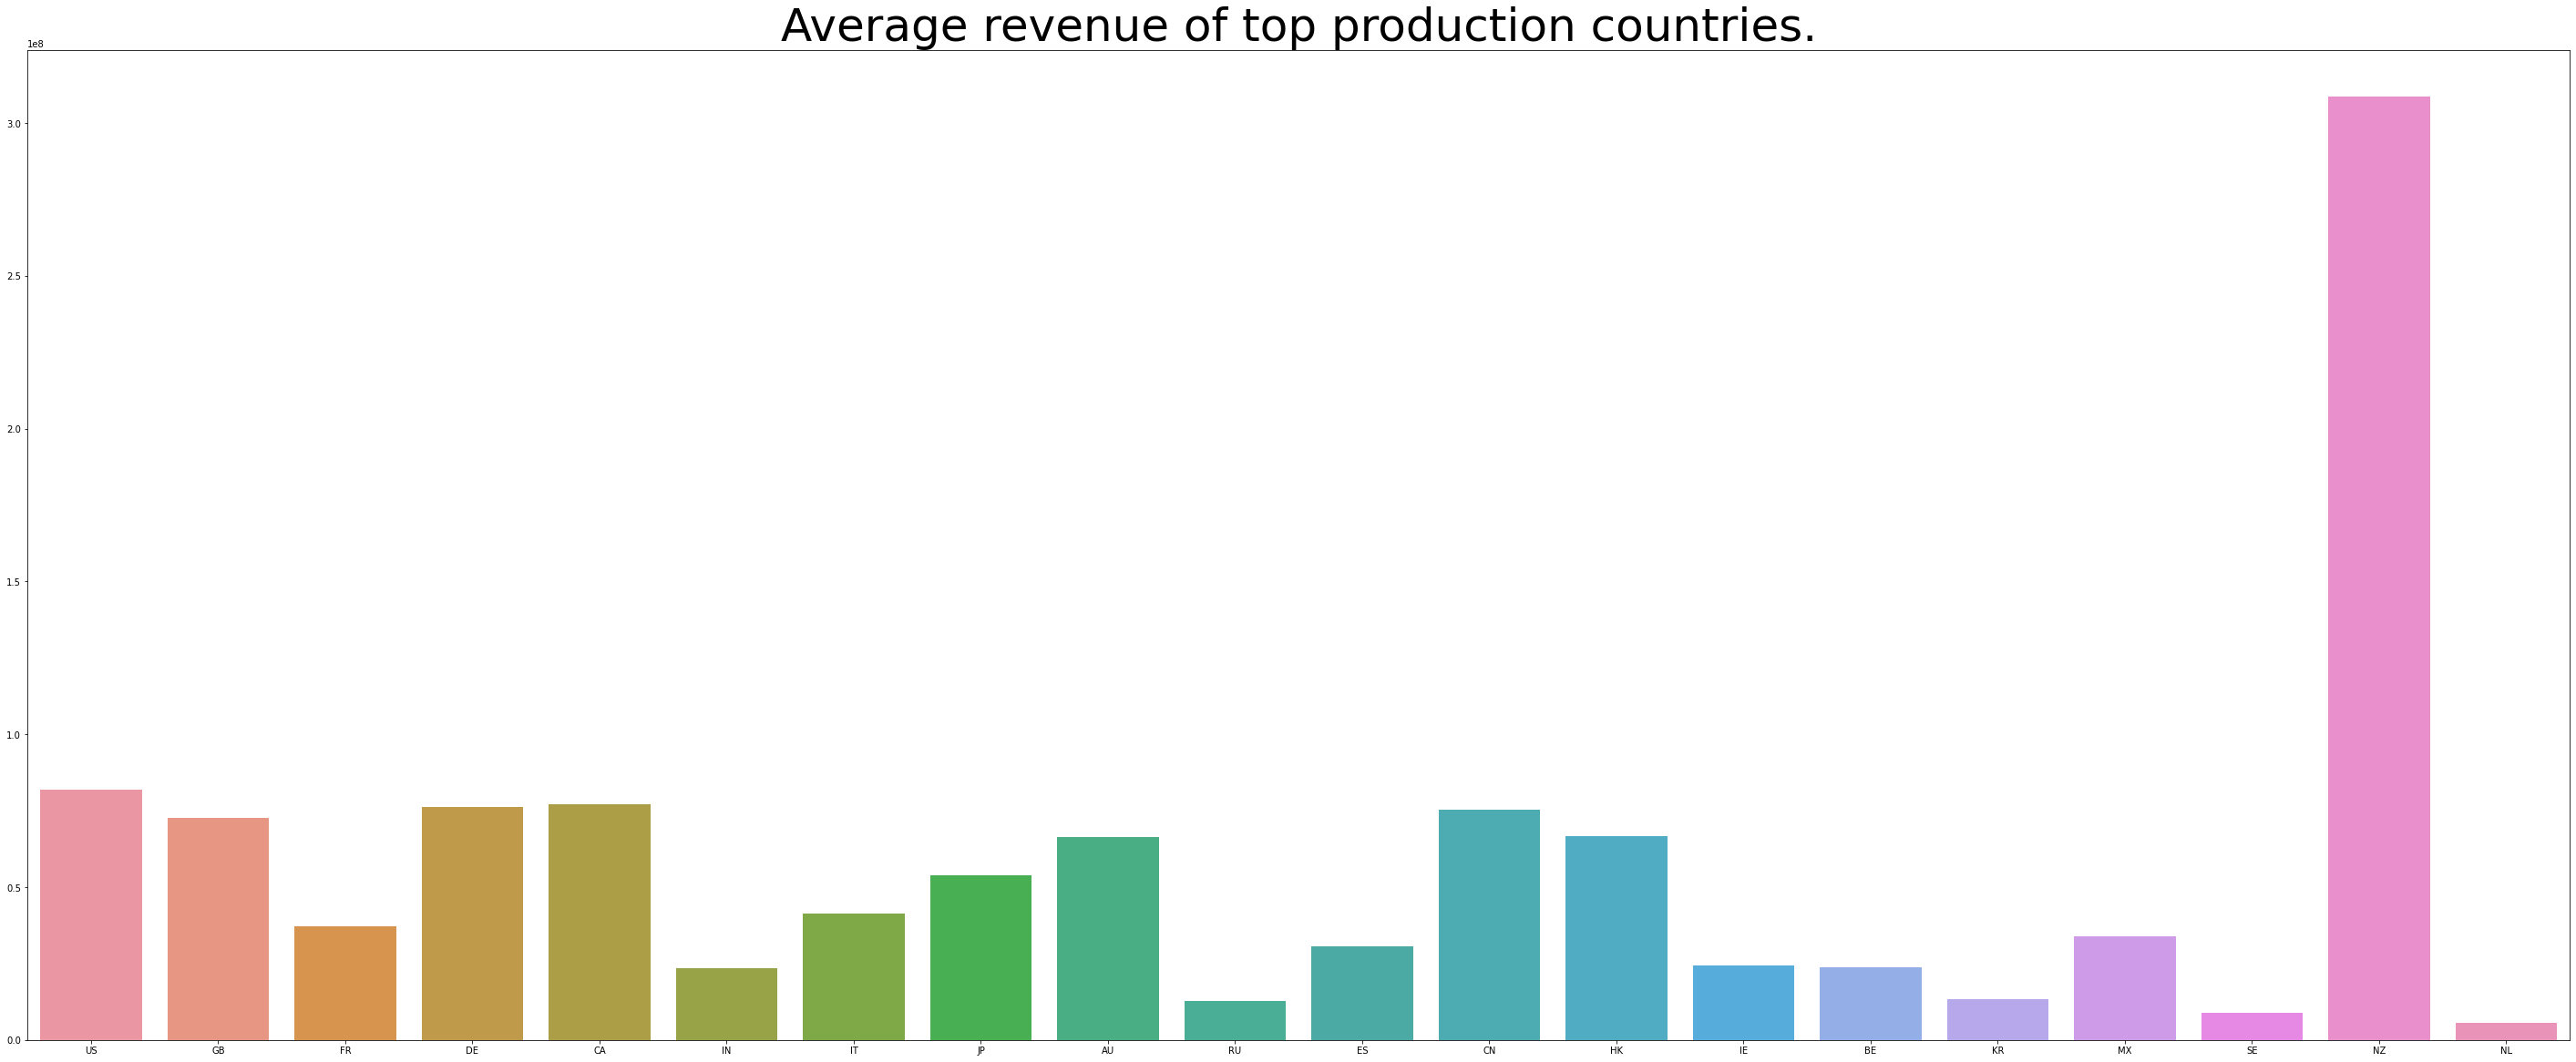

In [162]:
plt.figure(figsize = (50,20))
sns.barplot(x=top_production_country,y=avg)
plt.title("Average revenue of top production countries.", fontsize=50)

In [163]:
top_production_country=[]

def top_prod_country(df):
    
    total_count_prod_country=[]

    for i in df.production_countries:
        d=get_dict(i)
        for j in d:
            total_count_prod_country.append(j['iso_3166_1'])
            
    for i in Counter(total_count_prod_country).most_common(top):
        if i[1]>10:             ## taking the production_countries which has frequency count > 10
            top_production_country.append(i[0])

In [164]:
top_prod_country(train)

In [165]:
def top_prod_country_one_hot_encoding(df):
    df['all_prod_country'] = df['production_countries'].apply(lambda x: ' '.join(sorted([i['iso_3166_1'] 
                                    for i in get_dict(x) ])) if x!= {} else '')
    
    for i in top_production_country:
        df['prod_country_' + i] = df['all_prod_country'].apply(lambda x: 1 if i in x else 0)

In [166]:
top_prod_country_one_hot_encoding(train)

In [167]:
top_prod_country_one_hot_encoding(test)

In [168]:
train.drop(['production_countries','all_prod_country'], axis=1, inplace=True)
test.drop(['production_countries','all_prod_country'], axis=1, inplace=True)

In [169]:
train.shape

(3000, 103)

In [170]:
test.shape

(4398, 102)

## 14. release_date

In [171]:
## function for converting the date from yy to  yyyy format 

def date(x):
    x=str(x)
    year=x.split('/')[2]
    if int(year)<19:
        return x[:-2]+'20'+year
    else:
        return x[:-2]+'19'+year

In [172]:
## filling the missing value

train['release_date'] =train['release_date'].fillna('1/1/90').apply(lambda x: date(x))
test['release_date']  =test['release_date'].fillna('1/1/90').apply(lambda x: date(x))

In [173]:
## converted release date in yyyy format

train['release_date'] = train['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))
test['release_date']  = test['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))

In [174]:
## making 3 col from the release data i.e. release_weekday, release_month, release_year


train['release_weekday']   = train['release_date'].apply(lambda x:x.weekday())
train['release_month'] = train['release_date'].apply(lambda x:x.month)
train['release_year']  = train['release_date'].apply(lambda x:x.year)

test['release_weekday']   = test['release_date'].apply(lambda x:x.weekday())
test['release_month'] = test['release_date'].apply(lambda x:x.month)
test['release_year']  = test['release_date'].apply(lambda x:x.year)

In [175]:
## weekday

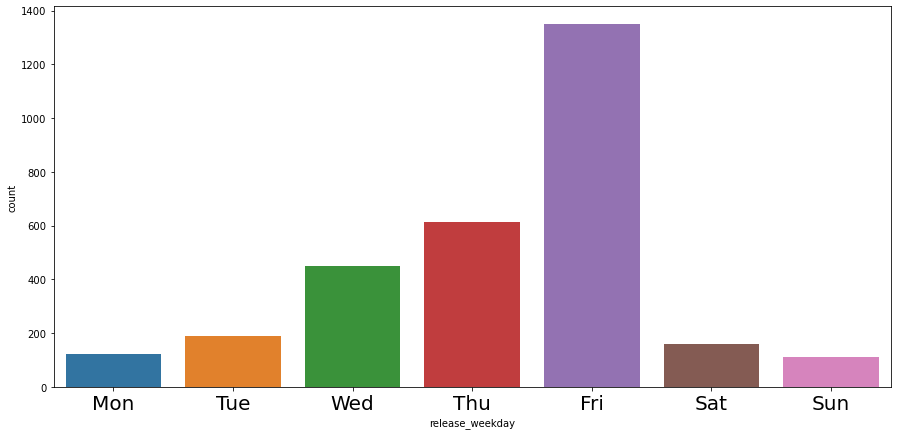

In [176]:
plt.figure(figsize = (15,7))
sns.countplot(train.release_weekday)
loc, labels = plt.xticks()
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

In [177]:
## from above figure we can see that the on the friday more number of movie is released

Text(0.5, 1.0, 'release_weekday vs revenue')

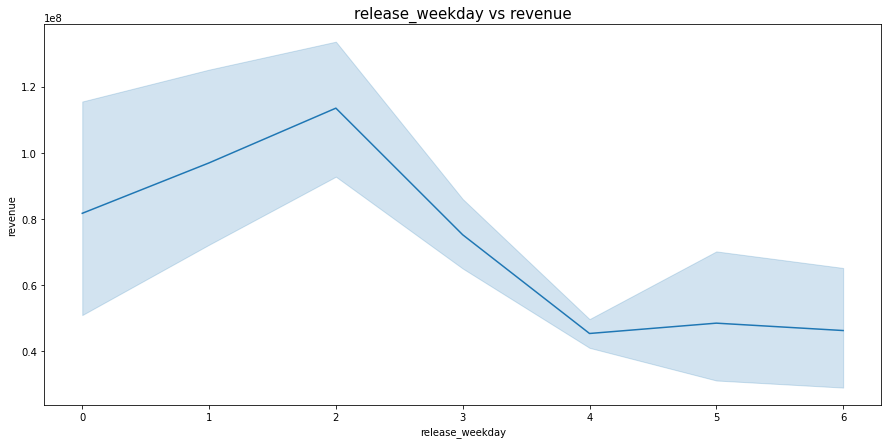

In [178]:
plt.figure(figsize = (15,7))
sns.lineplot(x=train.release_weekday, y=train.revenue)
plt.title("release_weekday vs revenue", fontsize=15)

In [179]:
## release month

<AxesSubplot:xlabel='release_month', ylabel='count'>

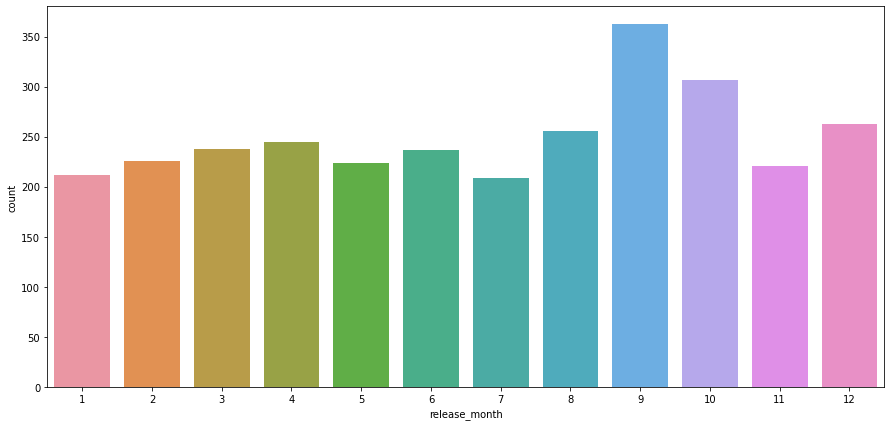

In [180]:
plt.figure(figsize = (15,7))
sns.countplot(train.release_month)

Text(0.5, 1.0, 'release_month vs revenue')

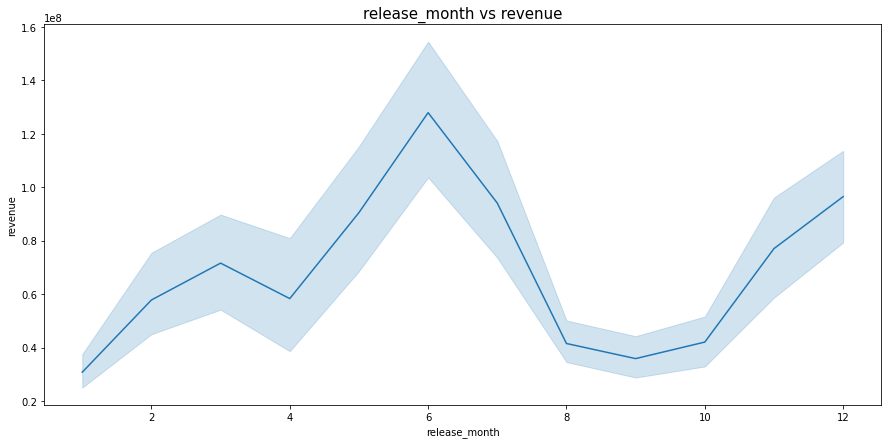

In [181]:
plt.figure(figsize = (15,7))
sns.lineplot(x=train.release_month, y=train.revenue)
plt.title("release_month vs revenue", fontsize=15)

In [182]:
## release year

<AxesSubplot:xlabel='release_year', ylabel='count'>

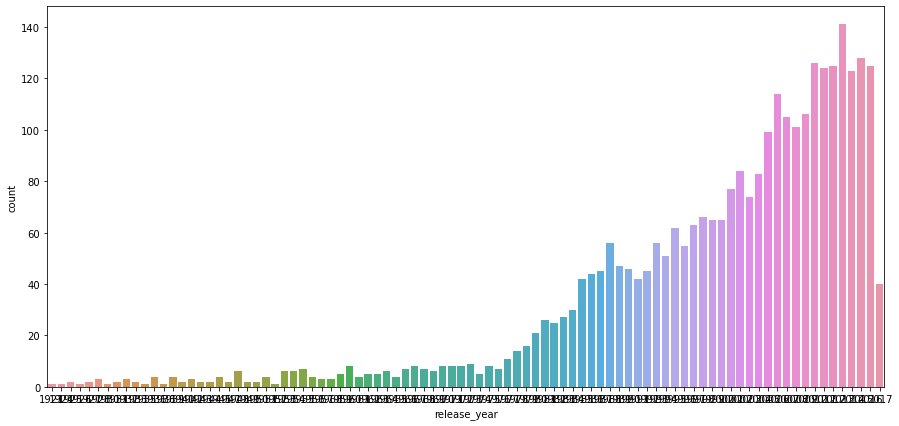

In [183]:
plt.figure(figsize = (15,7))
sns.countplot(train.release_year)

Text(0.5, 1.0, 'release_year vs revenue')

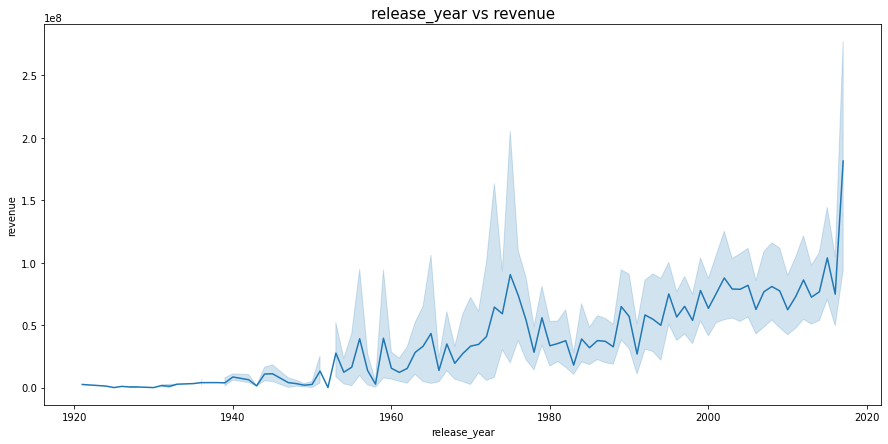

In [184]:
plt.figure(figsize = (15,7))
sns.lineplot(x=train.release_year, y=train.revenue)
plt.title("release_year vs revenue", fontsize=15)

In [185]:
## from the above figure we can see that the revenue is inceasing as the year increases

In [186]:
train.drop('release_date', axis=1, inplace=True)
test.drop('release_date', axis=1, inplace=True)

In [187]:
train.shape

(3000, 105)

In [188]:
test.shape

(4398, 104)

## 15. runtime

In [189]:
## check the distribution of data

Text(0.5, 1.0, 'train runtime distribution')

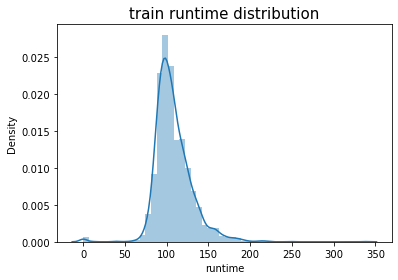

In [190]:
sns.distplot(train.runtime, kde=True)
plt.title("train runtime distribution", fontsize=15)

Text(0.5, 1.0, 'test runtime distribution')

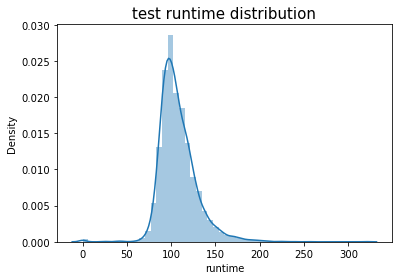

In [191]:
sns.distplot(test.runtime, kde=True)
plt.title("test runtime distribution", fontsize=15)

Text(0.5, 1.0, 'runtime vs revenue')

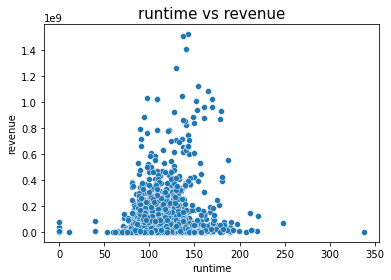

In [192]:
sns.scatterplot(x=train.runtime,y=train.revenue)
plt.title("runtime vs revenue", fontsize=15)

In [193]:
train.runtime.isnull().sum()

2

In [194]:
test.runtime.isnull().sum()

4

In [195]:
## as we can see thet the data is normally distributed we can fill the misssing value with mean()

In [196]:
train.runtime=train.runtime.fillna(train.runtime.mean())

In [197]:
test.runtime=test.runtime.fillna(test.runtime.mean())

## 16. spoken_languages

In [198]:
## number of spoken_languages and its effect on revenue

In [199]:
def number_of_spoken_lang(df):
    
    no_lang_spoken=[]

    for i in df.spoken_languages:
        d=get_dict(i)

        no_lang_spoken.append(len(d))
        
    df['no_lang_spoken']=no_lang_spoken

In [200]:
number_of_spoken_lang(train)

In [201]:
number_of_spoken_lang(test)

Text(0.5, 1.0, 'count of number of spoken language')

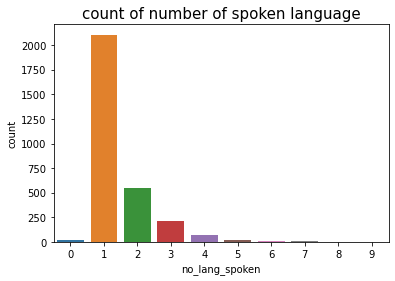

In [202]:
sns.countplot(train.no_lang_spoken)
plt.title("count of number of spoken language", fontsize=15)

In [203]:
## top spoken language

In [204]:
total_count_spoken_lang=[]

for i in train.spoken_languages:
    d=get_dict(i)
    for j in d:
        total_count_spoken_lang.append(j['iso_639_1'])

In [205]:
## top 20 spoken_languages

In [206]:
Counter(total_count_spoken_lang).most_common(top)

[('en', 2618),
 ('fr', 288),
 ('es', 239),
 ('de', 169),
 ('ru', 152),
 ('it', 124),
 ('ja', 89),
 ('zh', 68),
 ('hi', 56),
 ('pt', 43),
 ('ar', 40),
 ('ko', 37),
 ('cn', 36),
 ('ta', 27),
 ('pl', 25),
 ('hu', 24),
 ('la', 23),
 ('sv', 22),
 ('th', 22),
 ('cs', 20)]

In [207]:
top_spoken_lang=[]
for i in Counter(total_count_spoken_lang).most_common(top):
    top_spoken_lang.append(i[0])

In [208]:
avg=[]

for name in top_spoken_lang:
    idx=0
    l=[]
    for i in train.spoken_languages:
        d=get_dict(i)
    #     print(d)
        for j in d:
            if j['iso_639_1']==name:
#                 print(j['name'])
#                 print(train.revenue[idx])
                l.append(train.revenue[idx])
#                 print(idx)
                

        idx+=1
#     print(len(l))
    avg.append(np.mean(l))

Text(0.5, 1.0, 'Average revenue of top 10 spoken language.')

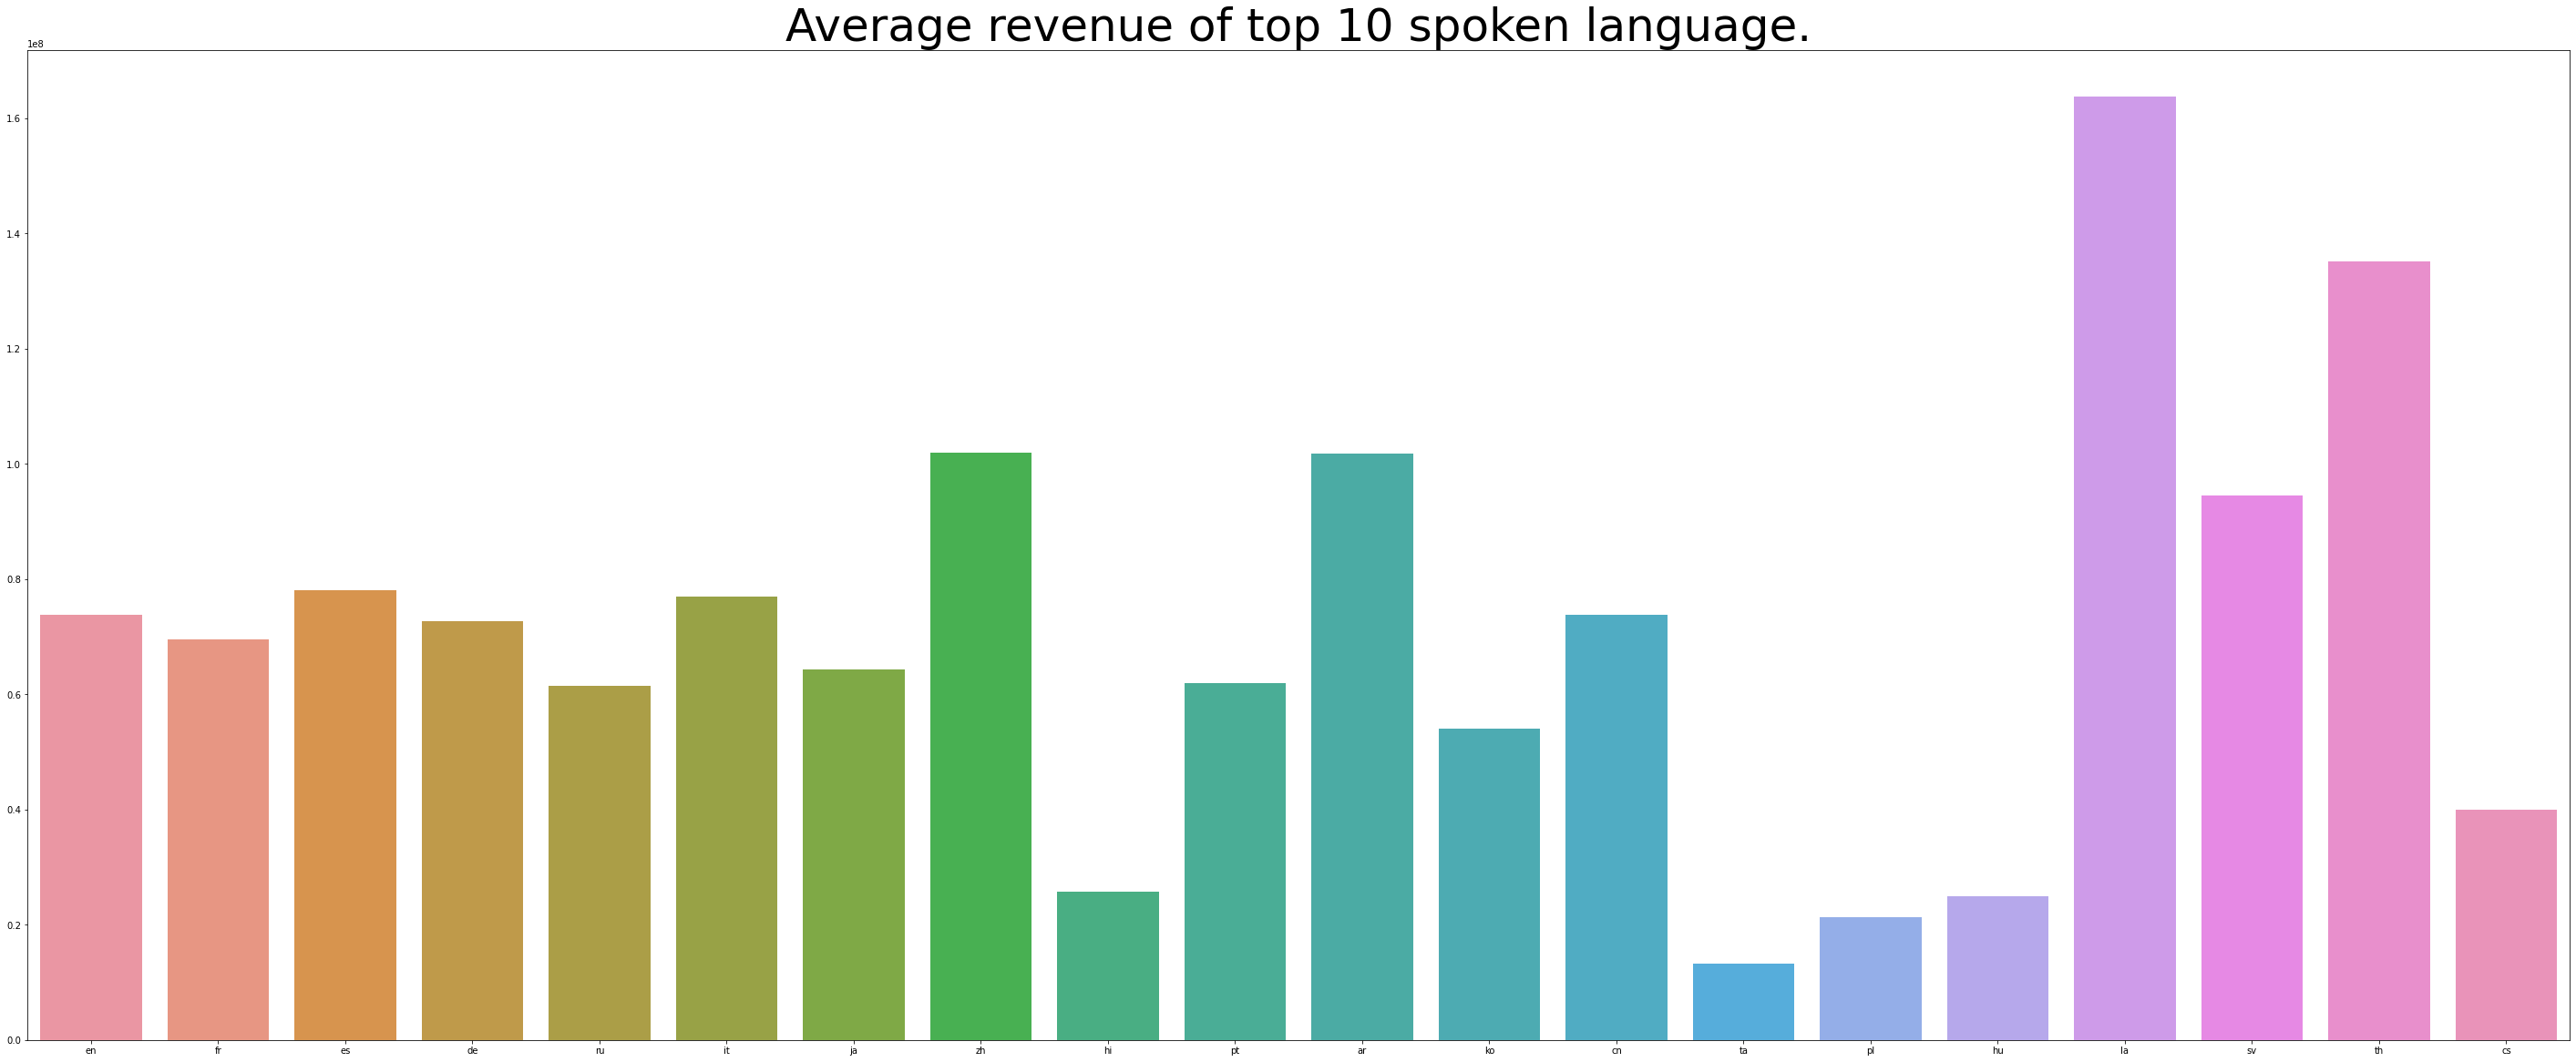

In [209]:
plt.figure(figsize = (50,20))
sns.barplot(x=top_spoken_lang,y=avg)
plt.title("Average revenue of top 10 spoken language.", fontsize=50)

In [210]:
top_spoken_lang=[]

def top_spoken_language(df):
    
    total_count_spoken_lang=[]

    for i in df.spoken_languages:
        d=get_dict(i)
        for j in d:
            total_count_spoken_lang.append(j['iso_639_1'])
            
    for i in Counter(total_count_spoken_lang).most_common(top):
        if i[1]>10:          ## taking the spoken_languages which has frequency count > 10
            top_spoken_lang.append(i[0])
    

In [211]:
top_spoken_language(train)

In [212]:
def top_spoken_language_one_hot_encoding(df):
    
    df['spoken_lang'] = df['spoken_languages'].apply(lambda x: ' '.join(sorted([i['iso_639_1'] for i in get_dict(x) ])) 
                                           if x!= {} else '')
    
    for i in top_spoken_lang:
        df['spoken_lang_' + i] = df['spoken_lang'].apply(lambda x: 1 if i in x else 0)

In [213]:
top_spoken_language_one_hot_encoding(train)

In [214]:
top_spoken_language_one_hot_encoding(test)

In [215]:
train.drop(['spoken_languages','spoken_lang'], axis=1, inplace=True)
test.drop(['spoken_languages','spoken_lang'], axis=1, inplace=True)

In [216]:
train.shape

(3000, 125)

In [217]:
test.shape

(4398, 124)

## 17. status

In [218]:
train.status.unique()

array(['Released', 'Rumored'], dtype=object)

In [219]:
## effect of status on revenue

In [220]:
train['is_released']=1
test['is_released']=1

In [221]:
## placing the 0 where status isn not Released

train.loc[ train['status']!= 'Released','is_released' ]=0
test.loc[ test['status']!= 'Released','is_released' ]=0

Text(0.5, 1.0, 'is_release vs revenue')

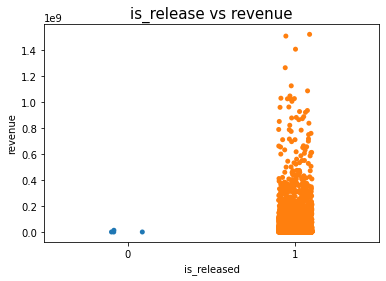

In [222]:
sns.stripplot(x=train.is_released,y=train.revenue)
plt.title("is_release vs revenue", fontsize=15)

In [223]:
## from the above fig. we can see that the movie which is not released has low revenue

In [224]:
train.drop('status', axis=1, inplace=True)
test.drop('status', axis=1, inplace=True)

## 18. tagline

In [225]:
## checking the effect of tagline on the revenue

In [226]:
train.tagline

0       The Laws of Space and Time are About to be Vio...
1       It can take a lifetime to find true love; she'...
2         The road to greatness can take you to the edge.
3                                                     NaN
4                                                     NaN
                              ...                        
2995    It was supposed to be a routine prisoner trans...
2996                                                  NaN
2997                 What's forgotten is not always gone.
2998    For the most cautious man on Earth, life is ab...
2999            They stole his life. He's taking it back.
Name: tagline, Length: 3000, dtype: object

In [227]:
train.tagline.isnull().sum()

597

In [228]:
def has_tagline(df):
    
    has_tagline=[]
    
    for i in df.tagline:
        if str(i)=='nan':
            has_tagline.append(0)
        else:
            has_tagline.append(1)
    
    df['has_tagline']=has_tagline

In [229]:
has_tagline(train)

In [230]:
has_tagline(test)

Text(0.5, 1.0, 'has_tagline vs revenue')

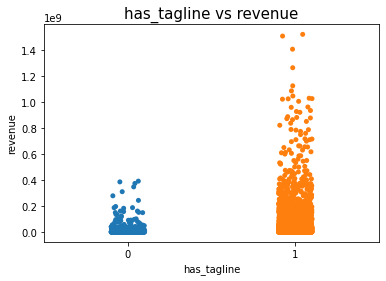

In [231]:
sns.stripplot(x=train.has_tagline,y=train.revenue)
plt.title("has_tagline vs revenue", fontsize=15)

In [232]:
## from the above fig. we can see that the movie which has tagline has more revenue that those whcih has no tagline 

In [233]:
train.drop('tagline', axis=1, inplace=True)
test.drop('tagline', axis=1, inplace=True)

## 19. title

In [234]:
train.title

0                         Hot Tub Time Machine 2
1       The Princess Diaries 2: Royal Engagement
2                                       Whiplash
3                                        Kahaani
4                                     Marine Boy
                          ...                   
2995                                     Chasers
2996                            We Are the Best!
2997                     The Long Kiss Goodnight
2998                            Along Came Polly
2999                                   Abduction
Name: title, Length: 3000, dtype: object

In [235]:
train.title.isnull().sum()

0

In [236]:
## effect of word count on revenue

In [237]:
train['title_word_count'] = train.title.str.split().str.len()
test['title_word_count'] = test.title.str.split().str.len()

Text(0.5, 1.0, 'title_word_count vs revenue')

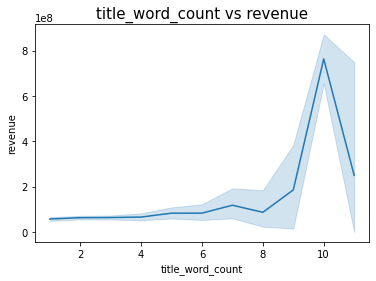

In [238]:
sns.lineplot(x=train.title_word_count,y=train.revenue)
plt.title("title_word_count vs revenue", fontsize=15)

In [239]:
## from the above fig. we can see that the movie which has more word count has more revenue

In [240]:
train.drop('title', axis=1, inplace=True)
test.drop('title', axis=1, inplace=True)

## 20. Keywords

In [241]:
train.Keywords

0       [{'id': 4379, 'name': 'time travel'}, {'id': 9...
1       [{'id': 2505, 'name': 'coronation'}, {'id': 42...
2       [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...
3       [{'id': 10092, 'name': 'mystery'}, {'id': 1054...
4                                                     NaN
                              ...                        
2995    [{'id': 378, 'name': 'prison'}, {'id': 572, 'n...
2996    [{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...
2997    [{'id': 441, 'name': 'assassination'}, {'id': ...
2998    [{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...
2999    [{'id': 591, 'name': 'cia'}, {'id': 822, 'name...
Name: Keywords, Length: 3000, dtype: object

In [242]:
train.Keywords.isnull().sum()

276

In [243]:
test.Keywords.isnull().sum()

393

In [244]:
## effect on the revenue which has keyword & which hasn't

In [245]:
def has_keyword(df):
    
    has_keyword=[]
    
    for i in df.Keywords:
        if str(i)=='nan':
            has_keyword.append(0)
        else:
            has_keyword.append(1)
        
    df['has_keyword']=has_keyword

In [246]:
has_keyword(train)

In [247]:
has_keyword(test)

<AxesSubplot:xlabel='has_keyword', ylabel='revenue'>

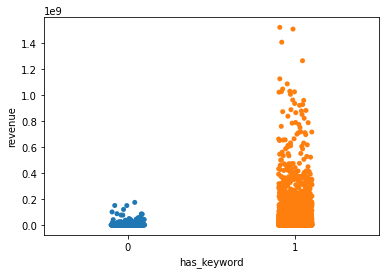

In [248]:
sns.stripplot(x=train.has_keyword,y=train.revenue)

In [249]:
## movie which has keyword has more revenue

In [250]:
## top keywords

In [251]:
total_count_keyword=[]

for i in train.Keywords:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_keyword.append(j['name'])

In [252]:
## top 20 Keywords

In [253]:
Counter(total_count_keyword).most_common(top)

[('woman director', 175),
 ('independent film', 155),
 ('duringcreditsstinger', 134),
 ('murder', 123),
 ('based on novel', 111),
 ('violence', 87),
 ('sport', 82),
 ('biography', 77),
 ('aftercreditsstinger', 75),
 ('dystopia', 73),
 ('revenge', 73),
 ('friendship', 72),
 ('sex', 71),
 ('suspense', 67),
 ('sequel', 66),
 ('love', 64),
 ('police', 64),
 ('teenager', 61),
 ('nudity', 57),
 ('female nudity', 53)]

In [254]:
top_keyword=[]
for i in Counter(total_count_keyword).most_common(top):
    top_keyword.append(i[0])

In [255]:
avg=[]

for name in top_keyword:
    idx=0
    l=[]
    for i in train.Keywords:
        d=get_dict(i)
    #     print(d)
        for j in d:
            if j['name']==name:
#                 print(j['name'])
#                 print(train.revenue[idx])
                l.append(train.revenue[idx])
#                 print(idx)
                

        idx+=1
#     print(len(l))
    avg.append(np.mean(l))

Text(0.5, 1.0, 'Average revenue of top production countries.')

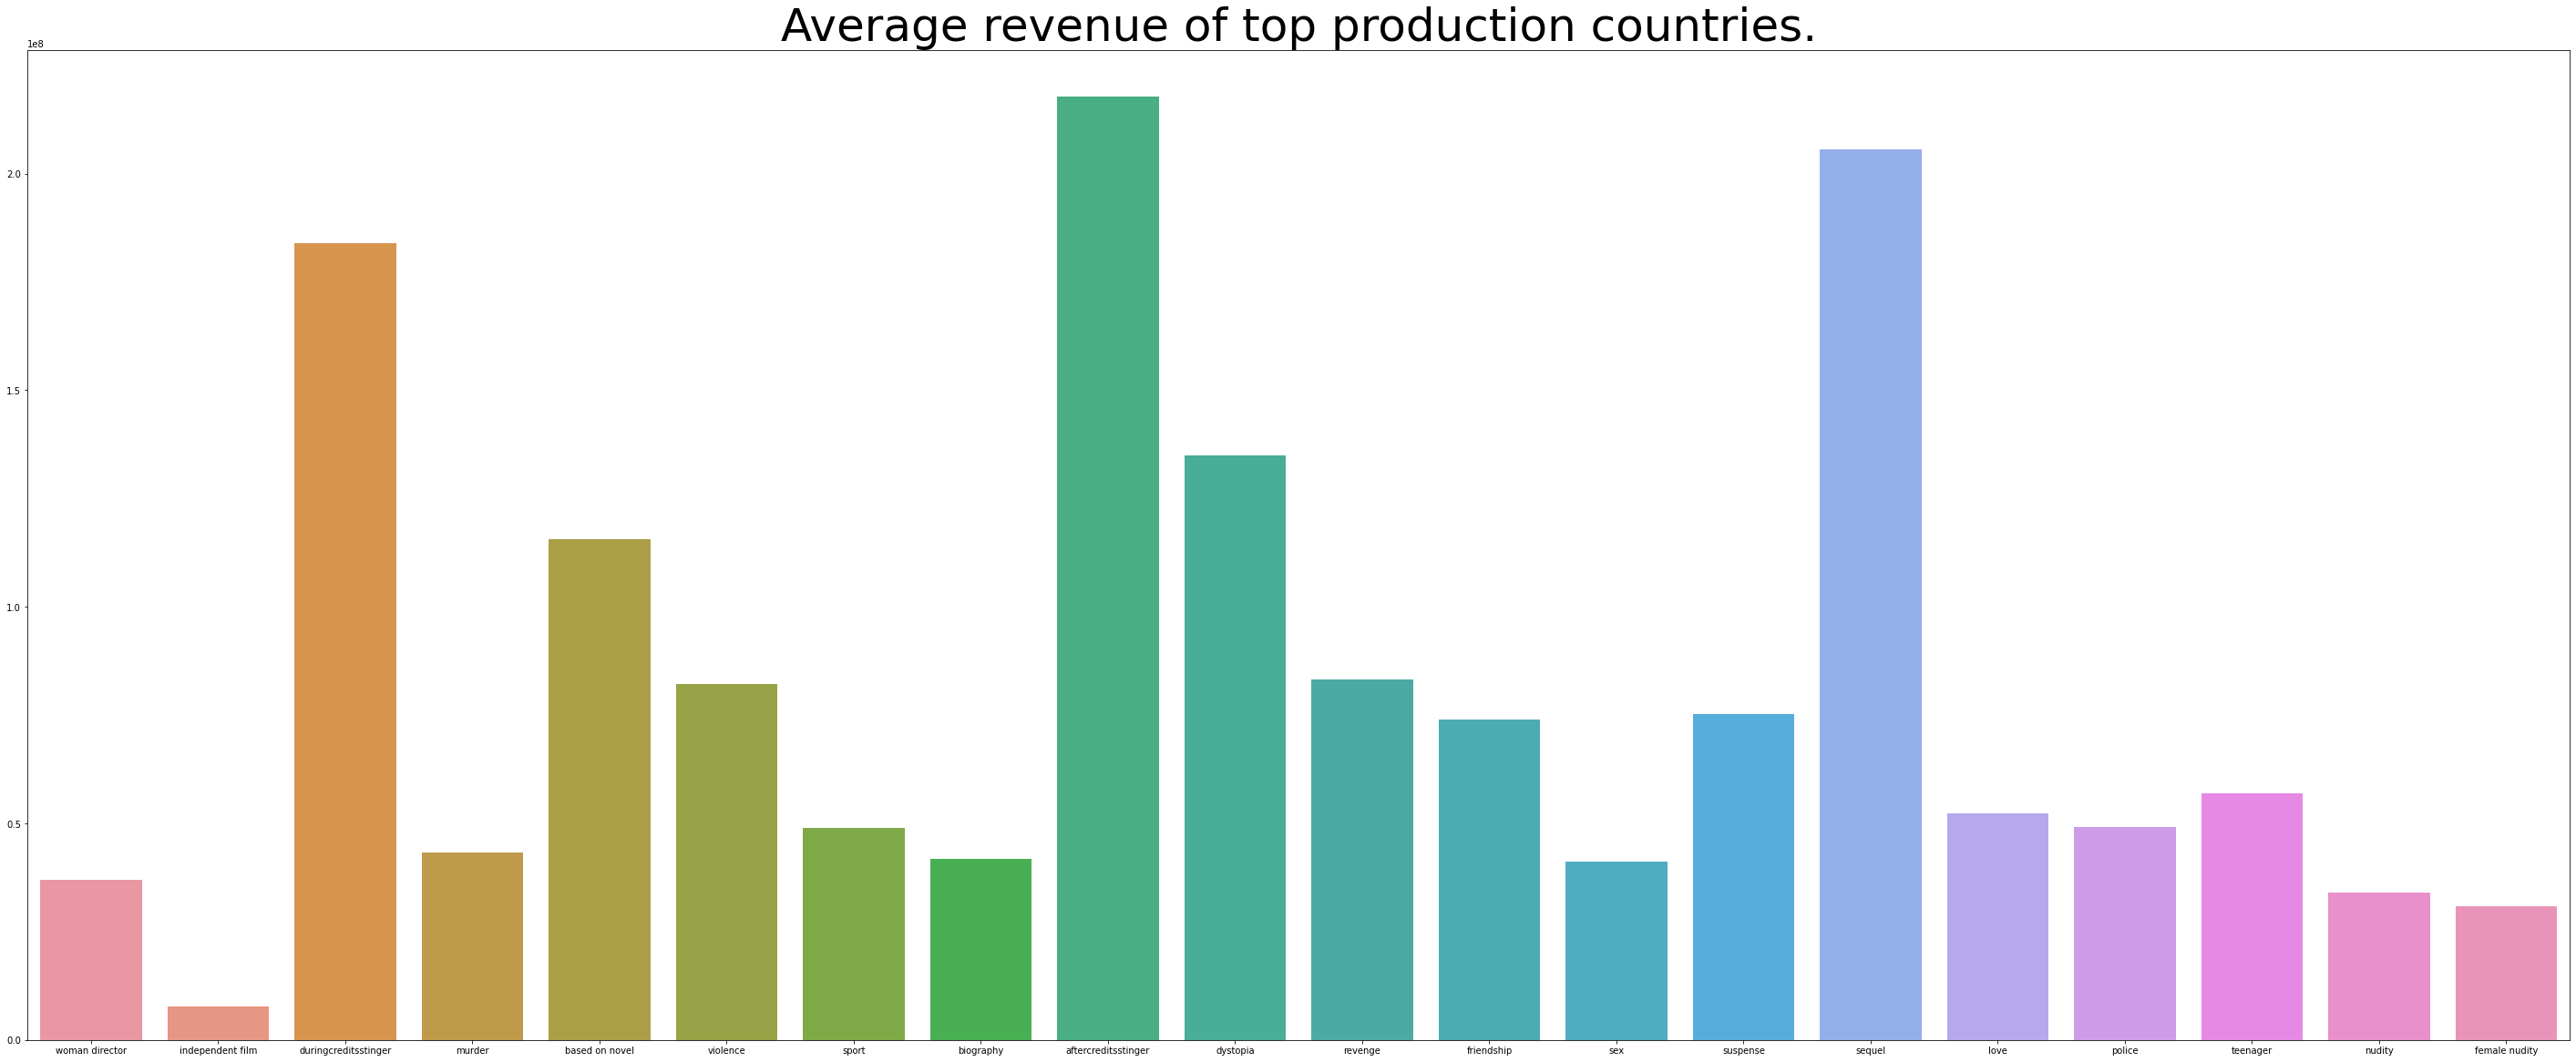

In [256]:
plt.figure(figsize = (50,20))
sns.barplot(x=top_keyword,y=avg)
plt.title("Average revenue of top production countries.", fontsize=50)

In [257]:
top_keyword=[]

def top_keywords(df):
    
    total_count_keyword=[]

    for i in df.Keywords:
        d=get_dict(i)
        for j in d:
            total_count_keyword.append(j['name'])
            
    
    for i in Counter(total_count_keyword).most_common(top):
        if i[1]>10:     ## taking the Keywords which has frequency count > 10
            top_keyword.append(i[0])


In [258]:
top_keywords(train)

In [259]:
def top_keywords_one_hot_encoding(df):
    
    df['all_keyword'] = df['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')
    
    for i in top_keyword:
        df['keyword_' + i] = df['all_keyword'].apply(lambda x: 1 if i in x else 0)
    

In [260]:
top_keywords_one_hot_encoding(train)

In [261]:
top_keywords_one_hot_encoding(test)

In [262]:
train.drop(['Keywords','all_keyword'], axis=1, inplace=True)
test.drop(['Keywords','all_keyword'], axis=1, inplace=True)

In [263]:
train.shape

(3000, 145)

In [264]:
test.shape

(4398, 144)

## 21. cast

In [265]:
train.cast

0       [{'cast_id': 4, 'character': 'Lou', 'credit_id...
1       [{'cast_id': 1, 'character': 'Mia Thermopolis'...
2       [{'cast_id': 5, 'character': 'Andrew Neimann',...
3       [{'cast_id': 1, 'character': 'Vidya Bagchi', '...
4       [{'cast_id': 3, 'character': 'Chun-soo', 'cred...
                              ...                        
2995    [{'cast_id': 2, 'character': 'Rock Reilly', 'c...
2996    [{'cast_id': 5, 'character': 'Bobo', 'credit_i...
2997    [{'cast_id': 10, 'character': 'Samantha Caine ...
2998    [{'cast_id': 8, 'character': 'Reuben Feffer', ...
2999    [{'cast_id': 2, 'character': 'Nathan Harper', ...
Name: cast, Length: 3000, dtype: object

In [266]:
## number of cast 

In [267]:
def number_of_cast(df):
    
    no_cast=[]

    for i in df.cast:
        d=get_dict(i)
        no_cast.append(len(d))
    
    df['no_cast']=no_cast

In [268]:
number_of_cast(train)

In [269]:
number_of_cast(test)

In [270]:
# sns.scatterplot(x=train.no_cast,y=train.revenue)

In [271]:
## top cast

In [272]:
total_count_cast=[]

for i in train.cast:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_cast.append(j['name'])

In [273]:
## top 20 cast

In [274]:
Counter(total_count_cast).most_common(top)

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23),
 ('Willem Dafoe', 23),
 ('Bill Murray', 22),
 ('Owen Wilson', 22),
 ('Nicolas Cage', 22),
 ('Sylvester Stallone', 21),
 ('Jason Statham', 21),
 ('Keith David', 21),
 ('John Goodman', 21),
 ('Mel Gibson', 21),
 ('Sigourney Weaver', 21)]

In [275]:
top_cast=[]
for i in Counter(total_count_cast).most_common(top):
    top_cast.append(i[0])

In [276]:
avg=[]

for name in top_cast:
    idx=0
    l=[]
    for i in train.cast:
        d=get_dict(i)
    #     print(d)
        for j in d:
            if j['name']==name:
#                 print(j['name'])
#                 print(train.revenue[idx])
                l.append(train.revenue[idx])
#                 print(idx)
                

        idx+=1
#     print(len(l))
    avg.append(np.mean(l))

Text(0.5, 1.0, 'Average revenue of top cast.')

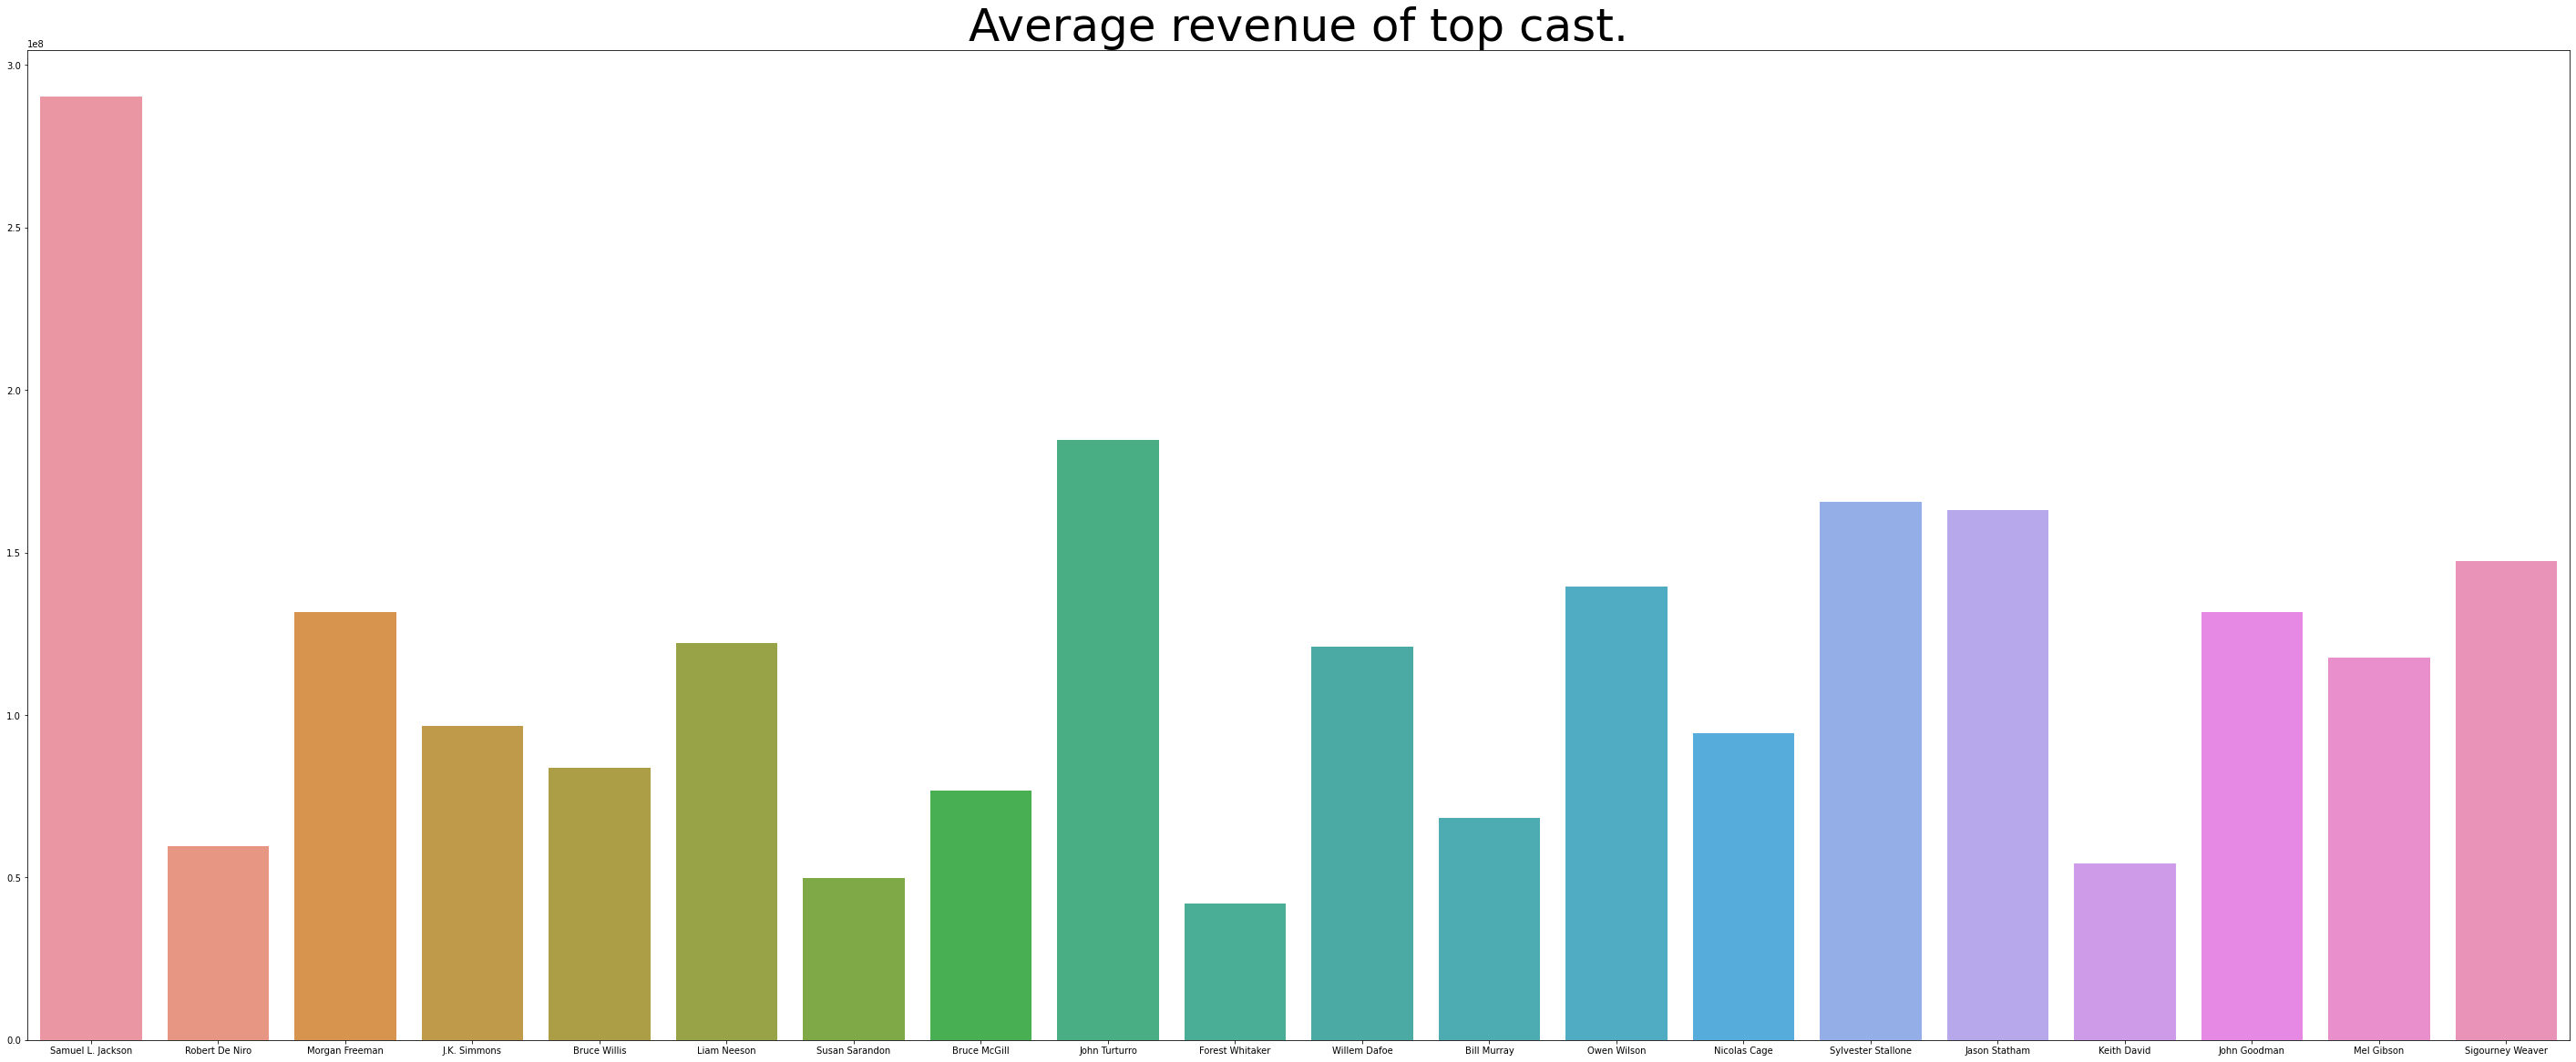

In [277]:
plt.figure(figsize = (50,20))
sns.barplot(x=top_cast,y=avg)
plt.title("Average revenue of top cast.", fontsize=50)

In [278]:
top_cast=[]

def top_cast_(df):
    
    total_count_cast=[]

    for i in df.cast:
        d=get_dict(i)
        for j in d:
            total_count_cast.append(j['name'])
            
    for i in Counter(total_count_cast).most_common(top):
        if i[1]>10:            ## taking the cast which has frequency count > 10
            top_cast.append(i[0])
    

In [279]:
top_cast_(train)

In [280]:
def top_cast_one_hot_encoding(df):
    
    df['all_cast'] = df['cast'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')
    
    for i in top_cast:
        df['cast_' + i] = df['all_cast'].apply(lambda x: 1 if i in x else 0)

In [281]:
top_cast_one_hot_encoding(train)

In [282]:
top_cast_one_hot_encoding(test)

In [283]:
train.drop(['cast','all_cast'], axis=1, inplace=True)
test.drop(['cast','all_cast'], axis=1, inplace=True)

In [284]:
train.shape

(3000, 165)

In [285]:
test.shape

(4398, 164)

## 22. crew

In [286]:
train.crew

0       [{'credit_id': '59ac067c92514107af02c8c8', 'de...
1       [{'credit_id': '52fe43fe9251416c7502563d', 'de...
2       [{'credit_id': '54d5356ec3a3683ba0000039', 'de...
3       [{'credit_id': '52fe48779251416c9108d6eb', 'de...
4       [{'credit_id': '52fe464b9251416c75073b43', 'de...
                              ...                        
2995    [{'credit_id': '52fe4494c3a368484e02ac7d', 'de...
2996    [{'credit_id': '5716b72ac3a3686678012c84', 'de...
2997    [{'credit_id': '52fe443a9251416c7502d579', 'de...
2998    [{'credit_id': '556f817b9251410866000a63', 'de...
2999    [{'credit_id': '5391990d0e0a260fb5001629', 'de...
Name: crew, Length: 3000, dtype: object

In [287]:
## number of crew

In [288]:
def number_of_crew(df):
    
    no_of_crew=[]

    for i in df.crew:
        d=get_dict(i)

        no_of_crew.append(len(d))
    
    df['no_of_crew']=no_of_crew

In [289]:
number_of_crew(train)

In [290]:
number_of_crew(test)

In [291]:
## top crew

In [292]:
total_count_crew=[]

for i in train.crew:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_crew.append(j['name'])

In [293]:
## top 20 crew

In [294]:
Counter(total_count_crew).most_common(top)

[('Avy Kaufman', 50),
 ('Robert Rodriguez', 44),
 ('Deborah Aquila', 40),
 ('James Newton Howard', 39),
 ('Mary Vernieu', 38),
 ('Steven Spielberg', 37),
 ('Luc Besson', 37),
 ('Jerry Goldsmith', 37),
 ('Francine Maisler', 35),
 ('Tricia Wood', 35),
 ('James Horner', 33),
 ('Kerry Barden', 32),
 ('Bob Weinstein', 30),
 ('Harvey Weinstein', 30),
 ('Janet Hirshenson', 30),
 ('Jane Jenkins', 29),
 ('John Debney', 28),
 ('Hans Zimmer', 28),
 ('John Papsidera', 28),
 ('Francis Ford Coppola', 28)]

In [295]:
top_crew=[]
for i in Counter(total_count_crew).most_common(top):
    top_crew.append(i[0])

In [296]:
avg=[]

for name in top_crew:
    idx=0
    l=[]
    for i in train.crew:
        d=get_dict(i)
    #     print(d)
        for j in d:
            if j['name']==name:
#                 print(j['name'])
#                 print(train.revenue[idx])
                l.append(train.revenue[idx])
#                 print(idx)
                

        idx+=1
#     print(len(l))
    avg.append(np.mean(l))

Text(0.5, 1.0, 'Average revenue of top crew.')

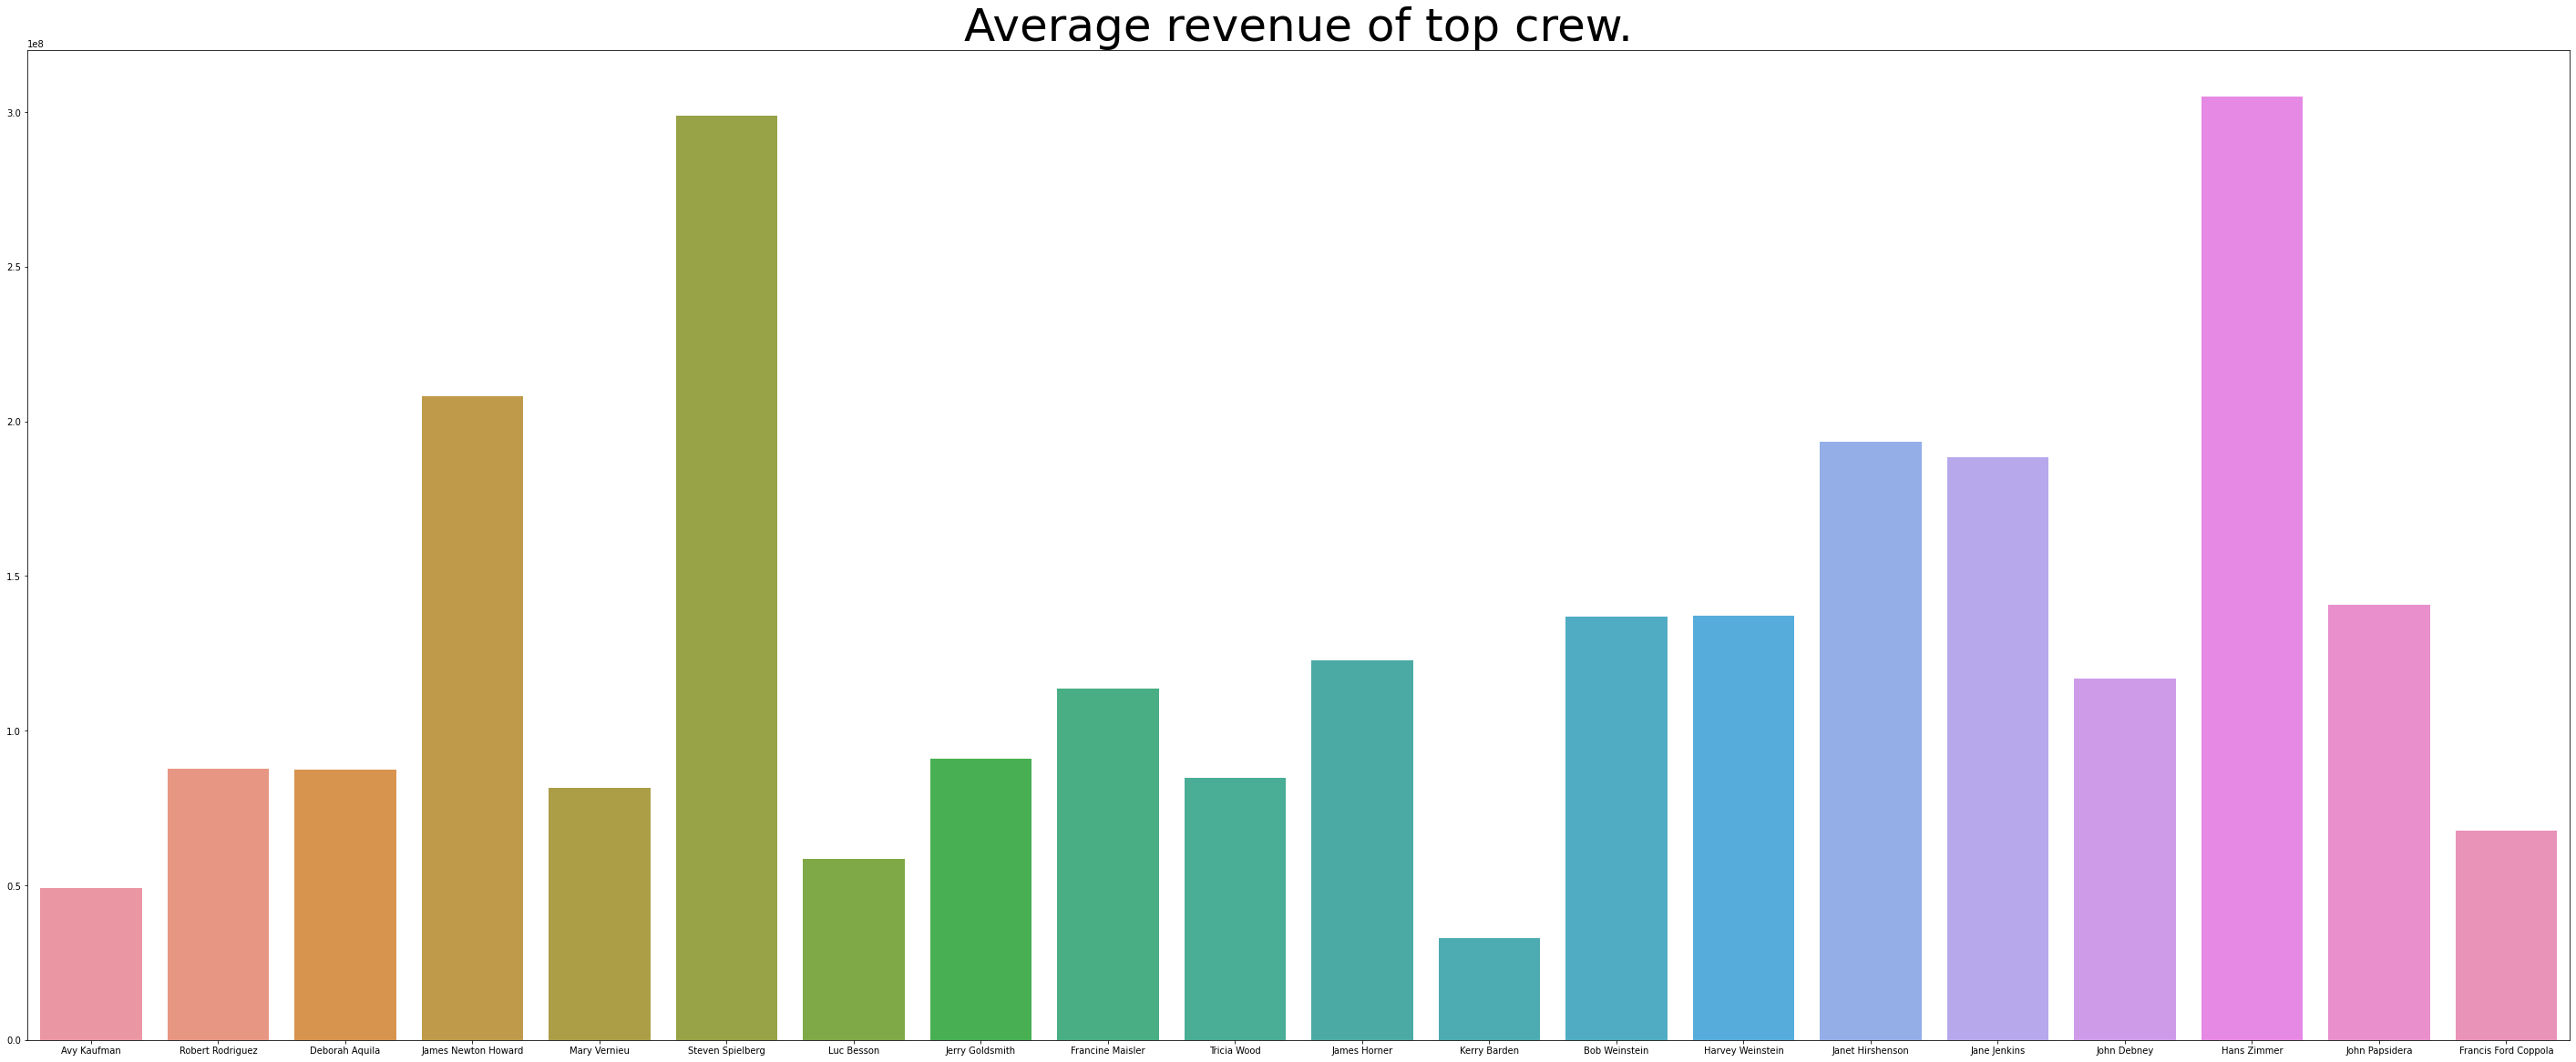

In [297]:
plt.figure(figsize = (50,20))
sns.barplot(x=top_crew,y=avg)
plt.title("Average revenue of top crew.", fontsize=50)

In [298]:
top_crew=[]

def top_crew_(df):
    
    total_count_crew=[]

    for i in df.crew:
        d=get_dict(i)
        for j in d:
            total_count_crew.append(j['name'])
            
    for i in Counter(total_count_crew).most_common(top):
        if i[1]>10:               ## taking the crew which has frequency count > 10
            top_crew.append(i[0])

In [299]:
top_crew_(train)

In [300]:
def top_crew_one_hot_encoding(df):
    
    df['all_crew'] = df['crew'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')
    
    for i in top_crew:
        df['crew_' + i] = df['all_crew'].apply(lambda x: 1 if i in x else 0)

In [301]:
top_crew_one_hot_encoding(train)

In [302]:
top_crew_one_hot_encoding(test)

In [303]:
train.drop(['crew','all_crew'], axis=1, inplace=True)
test.drop(['crew','all_crew'], axis=1, inplace=True)

In [304]:
train.shape

(3000, 185)

In [305]:
test.shape

(4398, 184)

## 23. popularity2

In [306]:
## checking the distribution of data

In [307]:
## train

Text(0.5, 1.0, 'train popularity2 distribution')

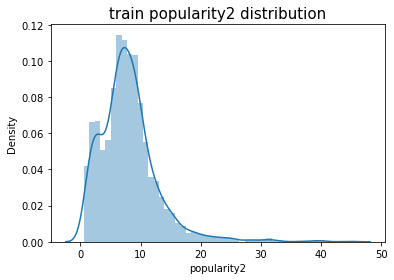

In [308]:
sns.distplot(train.popularity2, kde=True)
plt.title("train popularity2 distribution", fontsize=15)

In [309]:
## from the above fig. we can see the data is +ve skew. so tranforming the +ve dist. to noramal dist. using log transformation

Text(0.5, 1.0, 'train popularity2 distribution after transformation')

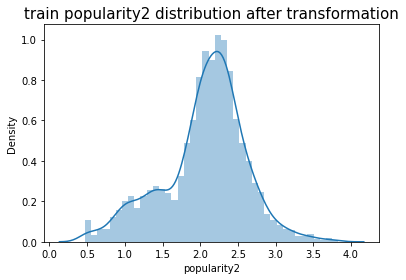

In [310]:
sns.distplot(np.log1p(train.popularity2), kde=True)
plt.title("train popularity2 distribution after transformation", fontsize=15)

In [311]:
## test

Text(0.5, 1.0, 'test popularity2 distribution')

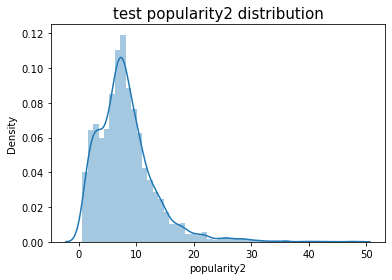

In [312]:
sns.distplot(test.popularity2, kde=True)
plt.title("test popularity2 distribution", fontsize=15)

Text(0.5, 1.0, 'test popularity2 distribution after transformation')

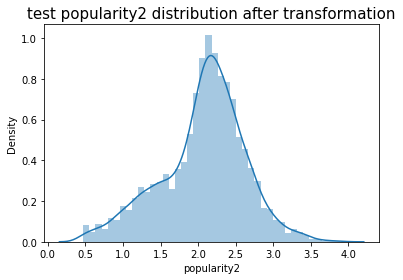

In [313]:
sns.distplot(np.log1p(test.popularity2), kde=True)
plt.title("test popularity2 distribution after transformation", fontsize=15)

In [314]:
## since the initial distribution is +ve skew for both train and test so we can fill the null value with 
## the mode or median value

Text(0.5, 1.0, 'popularity2 vs revenue')

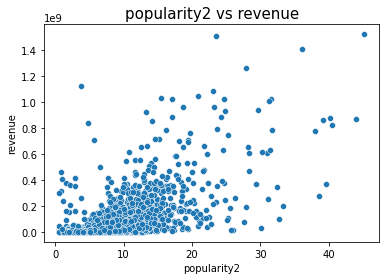

In [315]:
sns.scatterplot(x=train.popularity2,y=train.revenue)
plt.title("popularity2 vs revenue", fontsize=15)

In [316]:
train.popularity2.isnull().sum()

118

In [317]:
test.popularity2.isnull().sum()

179

In [318]:
train.popularity2=train.popularity2.fillna(train.popularity2.median())
test.popularity2=test.popularity2.fillna(test.popularity2.median())

## 24. rating

Text(0.5, 1.0, 'train rating distribution')

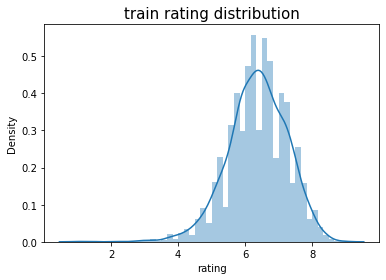

In [319]:
sns.distplot(train.rating, kde=True)
plt.title("train rating distribution", fontsize=15)

Text(0.5, 1.0, 'test rating distribution')

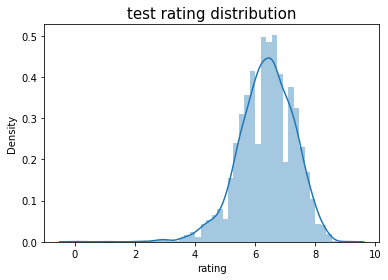

In [320]:
sns.distplot(test.rating, kde=True)
plt.title("test rating distribution", fontsize=15)

In [321]:
train.rating.isnull().sum()

118

In [322]:
test.rating.isnull().sum()

179

In [323]:
## in this case after looking the distribution we can fill the null value with the mean since its normal dist.

In [324]:
train.rating=train.rating.fillna(train.rating.mean())
test.rating=test.rating.fillna(test.rating.mean())

Text(0.5, 1.0, 'rating vs revenue')

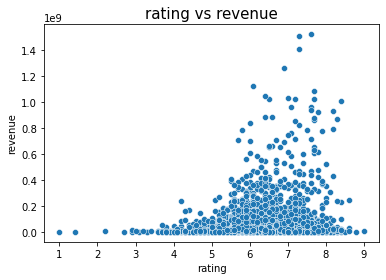

In [325]:
sns.scatterplot(x=train.rating,y=train.revenue)
plt.title("rating vs revenue", fontsize=15)

## 25. totalVotes

In [326]:
## checking the dist. of data

In [327]:
## train

Text(0.5, 1.0, 'train totalvotes distribution')

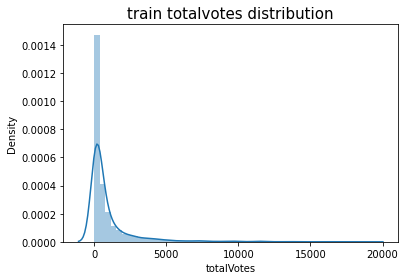

In [328]:
sns.distplot(train.totalVotes, kde=True)
plt.title("train totalvotes distribution", fontsize=15)

In [329]:
## +ve skew data

In [330]:
## applying the log tranfromation

Text(0.5, 1.0, 'train totalvotes distribution after transformation')

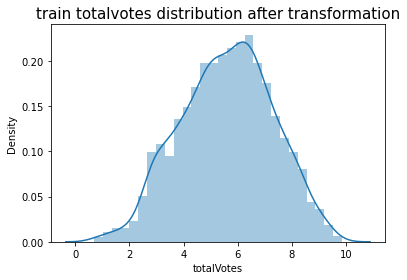

In [331]:
sns.distplot(np.log1p(train.totalVotes), kde=True)
plt.title("train totalvotes distribution after transformation", fontsize=15)

In [332]:
## test

Text(0.5, 1.0, 'test totalvotes distribution')

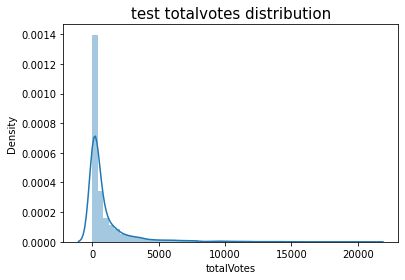

In [333]:
sns.distplot(test.totalVotes, kde=True)
plt.title("test totalvotes distribution", fontsize=15)

In [334]:
## +ve skew data

In [335]:
## applying the log transformation

Text(0.5, 1.0, 'test totalvotes distribution after transformation')

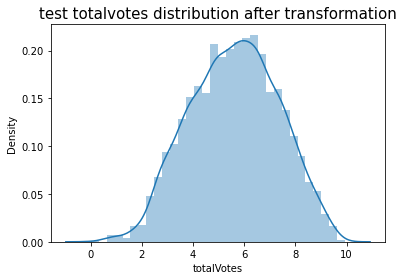

In [336]:
sns.distplot(np.log1p(test.totalVotes), kde=True)
plt.title("test totalvotes distribution after transformation", fontsize=15)

In [337]:
## null value checking

In [338]:
train.totalVotes.isnull().sum()

118

In [339]:
test.totalVotes.isnull().sum()

179

In [340]:
## since the initial dist. for totalvotes is +ve skew so we can fill the null value with mode or median

In [341]:
train.totalVotes=train.totalVotes.fillna(train.totalVotes.median())
test.totalVotes=test.totalVotes.fillna(test.totalVotes.median())

Text(0.5, 1.0, 'totalVotes vs revenue')

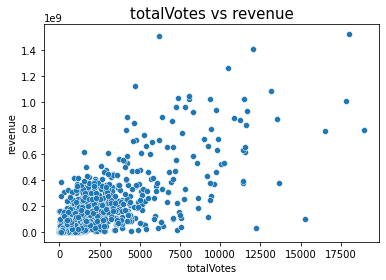

In [342]:
sns.scatterplot(x=train.totalVotes,y=train.revenue)
plt.title("totalVotes vs revenue", fontsize=15)

## Correlation heat map

<AxesSubplot:>

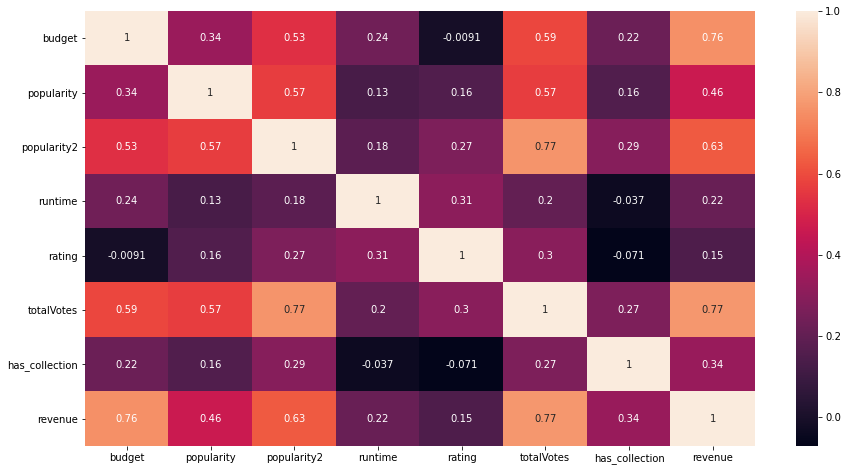

In [343]:
data=train[['budget','popularity','popularity2','runtime','rating','totalVotes','has_collection','revenue']]

plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot=True)

In [344]:
# sdfd

## log transformation for the +ve skew data

In [345]:
## train

In [346]:
train['popularity'] = np.log1p(train['popularity'])   #log(1+x)  #expm1 - inverse
train['popularity2'] = np.log1p(train['popularity2'])
train['budget'] = np.log1p(train['budget'])
train['runtime'] = np.log1p(train['runtime'])
train['totalVotes'] = np.log1p(train['totalVotes'])
train['revenue'] = np.log1p(train['revenue'])

In [347]:
## test 

In [348]:
test['popularity'] = np.log1p(test['popularity'])   #log(1+x)  #expm1 - inverse
test['popularity2'] = np.log1p(test['popularity2'])
test['budget'] = np.log1p(test['budget'])
test['runtime'] = np.log1p(test['runtime'])
test['totalVotes'] = np.log1p(test['totalVotes'])

## final shape

In [349]:
train.shape

(3000, 185)

In [350]:
test.shape

(4398, 184)

In [351]:
## checking the final null value in train and test dats sets 

In [352]:
train.isnull().sum().sum()

8

In [353]:
test.isnull().sum().sum()

17

In [354]:
## filling left null values with 0

In [355]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

## Model Building

In [356]:
X=train.drop('revenue', axis=1)

In [357]:
y=train.revenue

In [358]:
y

0       16.326300
1       18.370959
2       16.387512
3       16.588099
4       15.182615
          ...    
2995    14.283442
2996    12.103990
2997    18.309266
2998    18.962792
2999    18.223292
Name: revenue, Length: 3000, dtype: float64

In [359]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [360]:
## function to get the Root Mean Squared Logarithmic Error (RMSLE)

def get_score(y_true,y_pred):
    return np.sqrt(mean_squared_log_error( np.expm1(y_true), y_pred ))

In [361]:
## top n features vs error rate function

In [362]:
def top_features(model, feature_importance_df, top_n):

    error=[]
    features=[]
    
    for i in range(10,top_n,5):

        model.fit(X_train[feature_importance_df[:i].feature_names],y_train)

        predict=model.predict(X_test[feature_importance_df[:i].feature_names])
        predict=np.expm1(predict)

#         print(f'top {i} features ',get_score(y_test,predict))
        
        error.append(get_score(y_test,predict))
        features.append(i)
        
    return features, error

## Kfold validation

In [363]:
from sklearn.model_selection import KFold



def kfold_validation(model, k):

    folds = KFold(n_splits=k)
    
    df = pd.DataFrame()

    idx=0
    

    for train_index, test_index in folds.split(X,y):

        X_train ,y_train = X.loc[train_index], y.loc[train_index]

        model.fit(X_train,y_train)

        predict=model.predict(test)

        predict=np.expm1(predict)

        df.insert(idx,'fold'+str(idx), predict)

        idx+=1
        
    result=df.mean(axis=1)
    
    return result

In [364]:

def kfold_validation_top_features(model, feature_importance_df, k, top_n):

    folds = KFold(n_splits=k)
    
    df = pd.DataFrame()

    idx=0
    
    for train_index, test_index in folds.split(X,y):

        X_train ,y_train = X.loc[train_index], y.loc[train_index]

        model.fit(X_train[feature_importance_df[:top_n].feature_names],y_train)

        predict=model.predict(test[feature_importance_df[:top_n].feature_names])

        predict=np.expm1(predict)

        df.insert(idx,'fold'+str(idx), predict)

        idx+=1
        
    result=df.mean(axis=1)
    
    return result

## Linear Regression

In [365]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X_train,y_train)

predict=lr.predict(X_test)
predict=np.expm1(predict)

get_score(y_test,predict)

2.0174254150792494

In [556]:
lr_predict=kfold_validation(lr,10)

In [557]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=lr_predict

df.to_csv('linear_reg.csv', index=False)
df

,id,revenue
0,3001,2.987154e+07
1,3002,1.527614e+06
2,3003,6.597632e+06
3,3004,1.329487e+07
4,3005,1.684782e+06
...,...,...
4393,7394,1.748083e+07
4394,7395,7.384258e+07
4395,7396,2.302609e+07
4396,7397,2.117939e+07


## Decision Tree

In [366]:
## without hyperparameter tuning

In [367]:
from sklearn.tree import DecisionTreeRegressor

dc=DecisionTreeRegressor(random_state=42)

dc.fit(X_train,y_train)

predict=dc.predict(X_test)

predict=np.expm1(predict)

get_score(y_test,predict)

2.5156142922243

In [559]:
dc_predict=kfold_validation(dc,10)

In [560]:
# dc.fit(X,y)

# dc_predict=dc.predict(test)
# dc_predict=np.expm1(dc_predict)

In [561]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=dc_predict

df.to_csv('decision_tree.csv', index=False)
df

,id,revenue
0,3001,34273521.7
1,3002,9066722.4
2,3003,38856205.2
3,3004,25668389.8
4,3005,3245948.1
...,...,...
4393,7394,52386985.5
4394,7395,61891797.8
4395,7396,51967486.5
4396,7397,21367815.7


In [368]:
dc_feature_importance = pd.DataFrame({'feature_importance': dc.feature_importances_, 
              'feature_names': X.columns}).sort_values(by=['feature_importance'], 
                                                       ascending=False)

In [369]:
dc_feature_importance

,feature_importance,feature_names
0,0.345816,budget
1,0.094284,popularity
5,0.077239,totalVotes
96,0.073614,release_year
2,0.050166,runtime
...,...,...
24,0.000000,collec_Diary of a Wimpy Kid Collection
160,0.000000,cast_John Goodman
23,0.000000,collec_The Jaws Collection
22,0.000000,collec_Qatsi Collection


<AxesSubplot:xlabel='feature_importance', ylabel='feature_names'>

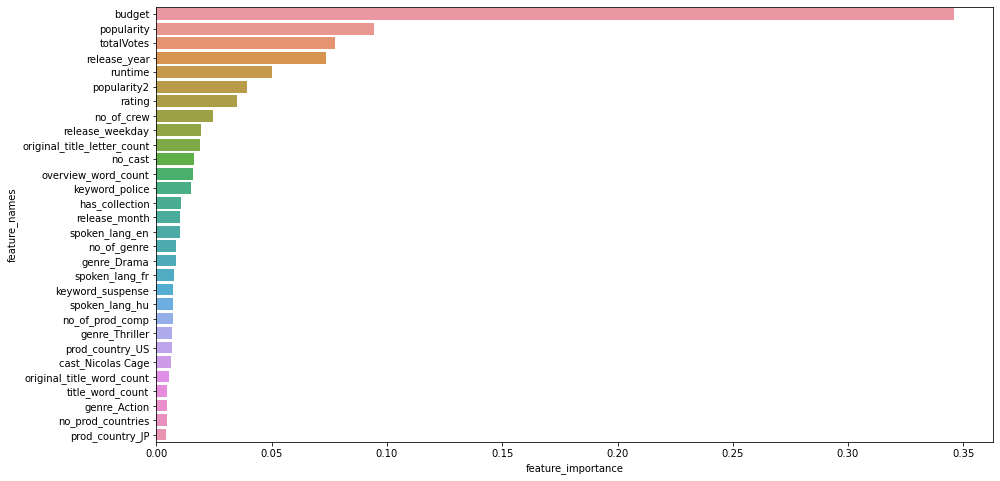

In [370]:
plt.figure(figsize = (15,8))
sns.barplot(x=dc_feature_importance[:30].feature_importance, y=dc_feature_importance[:30].feature_names)

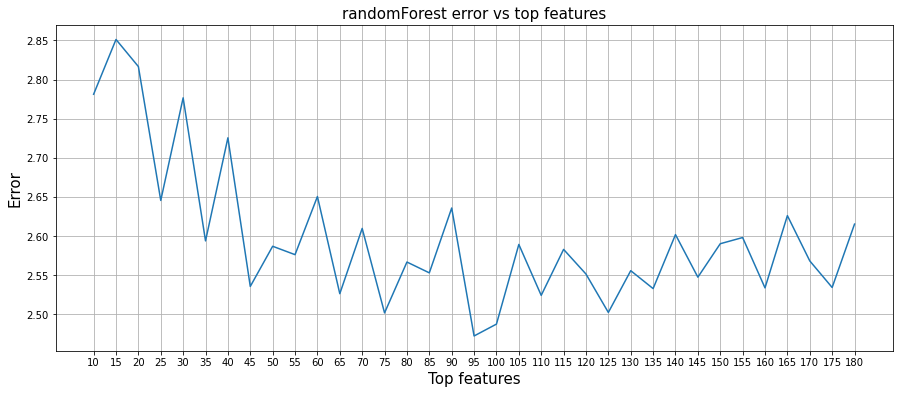

In [380]:
j,k=top_features(dc,dc_feature_importance, X.shape[1])
plt.figure(figsize = (15,6))
sns.lineplot(x=j, y=k)
plt.xticks(np.arange(10, X.shape[1], step=5))
plt.grid()
plt.xlabel('Top features',fontsize=15)
plt.ylabel('Error',fontsize=15)
plt.title("randomForest error vs top features", fontsize=15)
plt.show()

In [381]:
dc.fit(X_train[dc_feature_importance[:95].feature_names],y_train)

predict=dc.predict(X_test[dc_feature_importance[:95].feature_names])

predict=np.expm1(predict)

get_score(y_test,predict)

2.4723453569653704

In [ ]:
## applying hyperparameter tuning 

In [549]:
dc= DecisionTreeRegressor()

param_dist = {'max_depth':[2,5,6,8,9],
    'min_samples_split':[2,5,7,8,9],
    'min_samples_leaf':[2,5,7,8,9],
    'random_state':[42]
}

dc_rdcv = RandomizedSearchCV(dc,param_dist, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

dc_rdcv.fit(X_train, y_train)

dc_rdcv.best_params_

{'random_state': 42,
 'min_samples_split': 7,
 'min_samples_leaf': 8,
 'max_depth': 5}

In [550]:
predict=dc_rdcv.predict(X_test)

predict=np.expm1(predict)

get_score(y_test,predict)

2.03496561884608

In [568]:
dc_predict_tuning=kfold_validation(dc_rdcv,10)

In [565]:
# dc_rdcv.fit(X,y)

# dc_predict_tuning=dc_rdcv.predict(test)
# dc_predict_tuning=np.expm1(dc_predict_tuning)

In [569]:
dc_rdcv.best_params_

{'random_state': 42,
 'min_samples_split': 5,
 'min_samples_leaf': 8,
 'max_depth': 5}

In [570]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=dc_predict_tuning

df.to_csv('decision_tree_tuning.csv', index=False)
df

,id,revenue
0,3001,2.451047e+05
1,3002,3.410941e+06
2,3003,7.139365e+06
3,3004,3.376414e+07
4,3005,4.080511e+05
...,...,...
4393,7394,3.598762e+07
4394,7395,2.907894e+07
4395,7396,2.690266e+07
4396,7397,1.606816e+07


## Random forest 

In [ ]:
## without hyperparameter tuning 

In [571]:
from sklearn.ensemble import RandomForestRegressor

rdf=RandomForestRegressor(random_state=42)

rdf.fit(X_train,y_train)

predict=rdf.predict(X_test)
predict=np.expm1(predict)

get_score(y_test,predict)

1.8943216403456573

In [572]:
rdf_predict=kfold_validation(rdf,10)

In [573]:
# rdf.fit(X,y)

# rdf_predict=rdf.predict(test)
# rdf_predict=np.expm1(rdf_predict)

In [574]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=rdf_predict

df.to_csv('rdf.csv', index=False)
df

,id,revenue
0,3001,4.036999e+06
1,3002,1.591260e+06
2,3003,1.576499e+07
3,3004,1.190847e+07
4,3005,8.550228e+05
...,...,...
4393,7394,3.455097e+07
4394,7395,3.352868e+07
4395,7396,2.589279e+07
4396,7397,3.219212e+07


In [ ]:
# rdf.feature_importances_

In [575]:
rdf_feature_importance = pd.DataFrame({'feature_importance': rdf.feature_importances_, 
              'feature_names': X.columns}).sort_values(by=['feature_importance'], 
                                                       ascending=False)

In [576]:
rdf_feature_importance

,feature_importance,feature_names
0,3.462987e-01,budget
5,1.316829e-01,totalVotes
1,8.533736e-02,popularity
96,7.328882e-02,release_year
2,3.626242e-02,runtime
...,...,...
16,1.524872e-07,collec_Alien Collection
24,1.158178e-07,collec_Diary of a Wimpy Kid Collection
15,1.027497e-07,collec_Rambo Collection
13,8.741618e-08,collec_Ice Age Collection


<AxesSubplot:xlabel='feature_importance', ylabel='feature_names'>

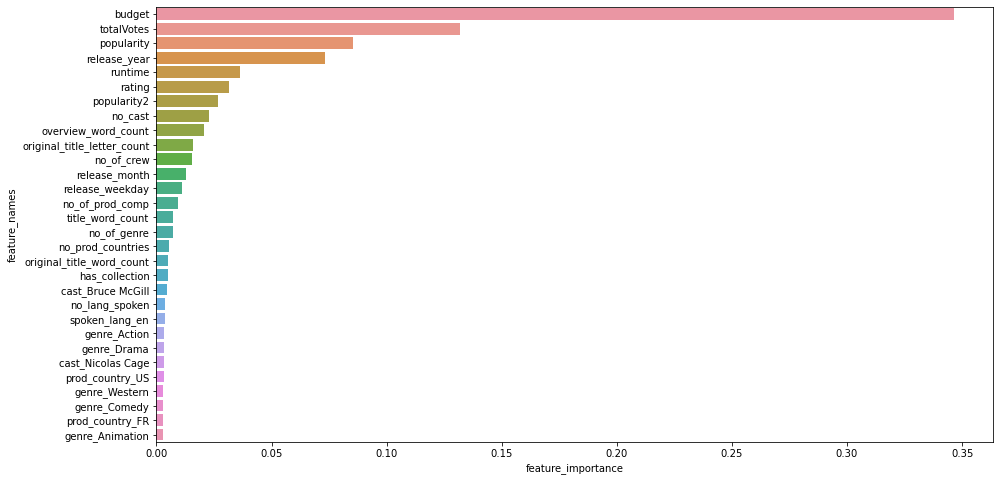

In [580]:
plt.figure(figsize = (15,8))
sns.barplot(x=rdf_feature_importance[:30].feature_importance, y=rdf_feature_importance[:30].feature_names)

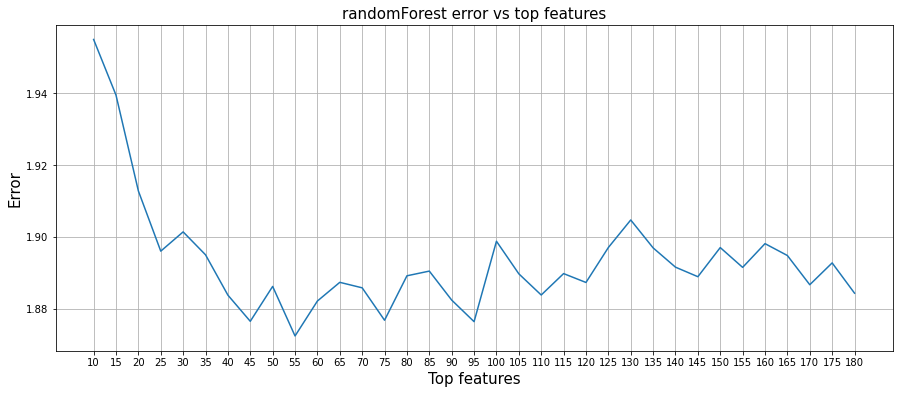

In [581]:
j,k=top_features(rdf,rdf_feature_importance, X.shape[1])
plt.figure(figsize = (15,6))
sns.lineplot(x=j, y=k)
plt.xticks(np.arange(10, X.shape[1], step=5))
plt.grid()
plt.xlabel('Top features',fontsize=15)
plt.ylabel('Error',fontsize=15)
plt.title("randomForest error vs top features", fontsize=15)
plt.show()

In [584]:
rdf.fit(X[rdf_feature_importance[:55].feature_names],y)

rdf_predict=rdf.predict(test[rdf_feature_importance[:55].feature_names])
rdf_predict=np.expm1(rdf_predict)

In [585]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=rdf_predict

df.to_csv('rdf.csv', index=False)
df

,id,revenue
0,3001,3.743403e+06
1,3002,1.476693e+06
2,3003,1.408486e+07
3,3004,1.220279e+07
4,3005,1.185800e+06
...,...,...
4393,7394,3.218895e+07
4394,7395,3.155936e+07
4395,7396,2.815615e+07
4396,7397,3.415471e+07


In [ ]:
## applying hyperparameter tuning 

In [594]:
rdf= RandomForestRegressor()

param_dist = {'n_estimators':[100,150,200,250,300,350,400,450,500],
    'max_depth':[2,5,7,8,9],
    'min_samples_split':[2,5,7,8,9],
    'min_samples_leaf':[2,5,7,8,9],
    'random_state':[42],
    'max_samples':[0.7,0.8,1.0],
}

rdf_rdcv = RandomizedSearchCV(rdf,param_dist, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1)

rdf_rdcv.fit(X_train, y_train)

rdf_rdcv.best_params_

{'random_state': 42,
 'n_estimators': 500,
 'min_samples_split': 9,
 'min_samples_leaf': 5,
 'max_samples': 0.8,
 'max_depth': 9}

In [595]:
predict=rdf_rdcv.predict(X_test)

predict=np.expm1(predict)

get_score(y_test,predict)

1.8803866850341082

In [596]:
rdf_feature_imp_tuning = pd.DataFrame({'feature_importance': rdf_rdcv.best_estimator_.feature_importances_,
              'feature_names': X.columns}).sort_values(by=['feature_importance'],
                                                       ascending=False)

In [597]:
rdf_feature_imp_tuning

,feature_importance,feature_names
0,0.459196,budget
5,0.124849,totalVotes
1,0.092698,popularity
96,0.076006,release_year
3,0.044769,popularity2
...,...,...
86,0.000000,prod_country_HK
72,0.000000,prod_comp_Working Title Films
71,0.000000,prod_comp_Dune Entertainment
70,0.000000,prod_comp_BBC Films


<AxesSubplot:xlabel='feature_importance', ylabel='feature_names'>

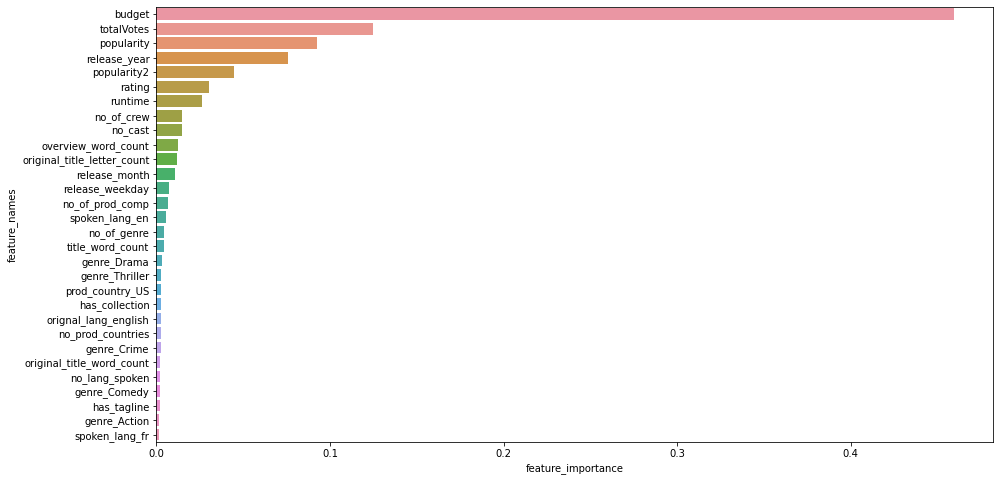

In [598]:
plt.figure(figsize = (15,8))
sns.barplot(x=rdf_feature_imp_tuning[:30].feature_importance, y=rdf_feature_imp_tuning[:30].feature_names)

In [599]:
rdf_rdcv.fit(X[rdf_feature_imp_tuning[:30].feature_names],y)

rdf_predict_tuning=rdf_rdcv.predict(test[rdf_feature_imp_tuning[:30].feature_names])
rdf_predict_tuning=np.expm1(rdf_predict_tuning)

In [600]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=rdf_predict_tuning

df.to_csv('rdf_tuning.csv', index=False)
df

,id,revenue
0,3001,9.425727e+05
1,3002,1.638287e+06
2,3003,1.012346e+07
3,3004,1.660717e+07
4,3005,8.194729e+05
...,...,...
4393,7394,3.785803e+07
4394,7395,2.788798e+07
4395,7396,2.449367e+07
4396,7397,2.415806e+07


## XGboost

In [ ]:
## without hyperparameter tuning 

In [630]:
from xgboost import XGBRegressor

xgb=XGBRegressor(random_state=42)

xgb.fit(X_train,y_train)

predict=xgb.predict(X_test)
predict=np.expm1(predict)

get_score(y_test,predict)

2.0094840713957716

In [632]:
xgb_predict=kfold_validation(xgb,10)

In [633]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=xgb_predict

df.to_csv('xgb.csv', index=False)
df

,id,revenue
0,3001,1.403522e+07
1,3002,1.441428e+06
2,3003,1.151540e+07
3,3004,2.315592e+07
4,3005,9.955964e+05
...,...,...
4393,7394,4.008873e+07
4394,7395,5.477260e+07
4395,7396,4.912502e+07
4396,7397,1.297816e+07


In [418]:
# xgb.feature_importances_

In [419]:
# from xgboost import plot_importance
# from matplotlib import pyplot

In [420]:
# fig, ax = plt.subplots(figsize=(8, 13))
# plot_importance(xgb, max_num_features=30, height=0.5, ax=ax)
# pyplot.show()

In [602]:
xgboost_feature_importance = pd.DataFrame({'feature_importance': xgb.feature_importances_, 
              'feature_names': X.columns}).sort_values(by=['feature_importance'], 
                                                       ascending=False)

In [603]:
xgboost_feature_importance

,feature_importance,feature_names
113,0.076967,spoken_lang_hu
63,0.042499,prod_comp_TriStar Pictures
115,0.036823,spoken_lang_sv
0,0.035662,budget
55,0.030813,prod_comp_Paramount Pictures
...,...,...
13,0.000000,collec_Ice Age Collection
114,0.000000,spoken_lang_la
151,0.000000,cast_John Turturro
155,0.000000,cast_Owen Wilson


<AxesSubplot:xlabel='feature_importance', ylabel='feature_names'>

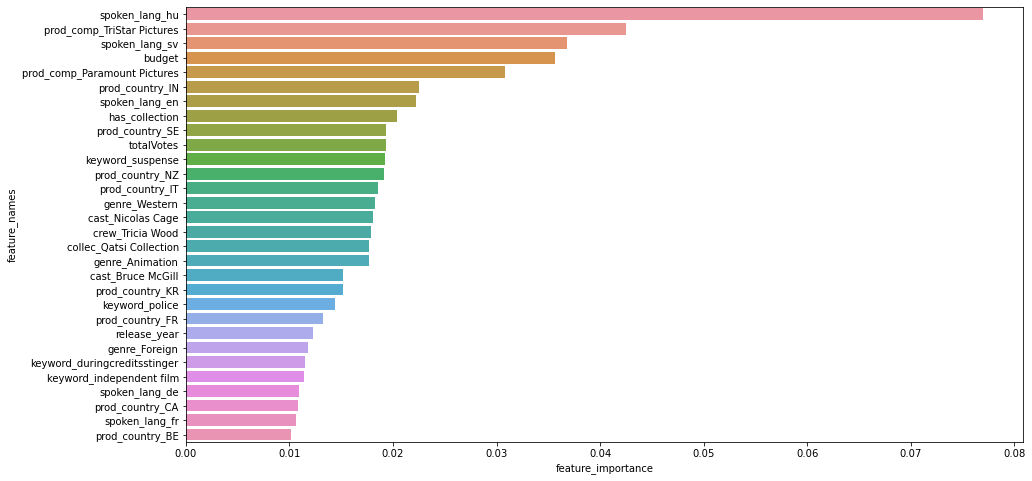

In [604]:
plt.figure(figsize = (15,8))
sns.barplot(x=xgboost_feature_importance[:30].feature_importance, y=xgboost_feature_importance[:30].feature_names)

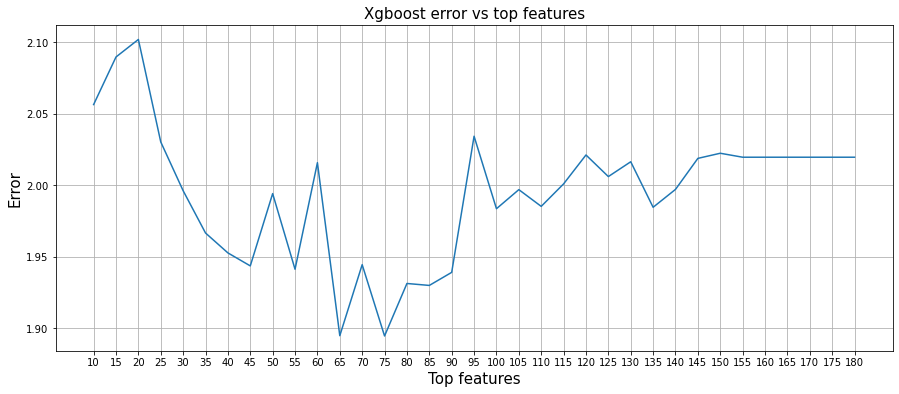

In [605]:
j,k=top_features(xgb,xgboost_feature_importance, X.shape[1])
plt.figure(figsize = (15,6))
sns.lineplot(x=j, y=k)
plt.xticks(np.arange(10, X.shape[1], step=5))
plt.grid()
plt.xlabel('Top features',fontsize=15)
plt.ylabel('Error',fontsize=15)
plt.title("Xgboost error vs top features", fontsize=15)
plt.show()

In [608]:
xgb.fit(X[xgboost_feature_importance[:50].feature_names],y)
xgb_predict=xgb.predict(test[xgboost_feature_importance[:50].feature_names])
xgb_predict=np.expm1(xgb_predict)

In [609]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=xgb_predict

df.to_csv('xgb.csv', index=False)
df

,id,revenue
0,3001,2.096082e+07
1,3002,5.163374e+06
2,3003,7.970723e+06
3,3004,1.286238e+06
4,3005,6.704632e+05
...,...,...
4393,7394,1.924200e+07
4394,7395,5.999884e+07
4395,7396,3.742006e+07
4396,7397,2.454545e+07


In [427]:
## applying hyperparameter tuning 

In [610]:
xgb = XGBRegressor()

param_dist = {
    'eta': [0.01,0.1,0.2],
    'gamma': [0,1,1.45], 
    'max_depth': [5,6,7],
    'min_child_weight': [1,3],
    'subsample': [0.6,0.7,0.8],
    'colsample_bytree': [0.6,0.7,0.8], 
    'colsample_bylevel': [0.5,0.6,0.8], 
    'seed': [22]
}

xgb_rdcv = RandomizedSearchCV(xgb,param_dist, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1)

xgb_rdcv.fit(X_train, y_train)

xgb_rdcv.best_params_

{'subsample': 0.8,
 'seed': 22,
 'min_child_weight': 3,
 'max_depth': 7,
 'gamma': 1.45,
 'eta': 0.1,
 'colsample_bytree': 0.7,
 'colsample_bylevel': 0.5}

In [611]:
xgboost_feature_imp_tuning = pd.DataFrame({'feature_importance': xgb_rdcv.best_estimator_.feature_importances_,
              'feature_names': X.columns}).sort_values(by=['feature_importance'],
                                                       ascending=False)

In [612]:
xgboost_feature_imp_tuning

,feature_importance,feature_names
0,0.057599,budget
6,0.033477,has_collection
3,0.031258,popularity2
34,0.029847,genre_Adventure
5,0.024329,totalVotes
...,...,...
90,0.000000,prod_country_MX
68,0.000000,prod_comp_Village Roadshow Pictures
64,0.000000,prod_comp_Relativity Media
26,0.000000,collec_Cars Collection


<AxesSubplot:xlabel='feature_importance', ylabel='feature_names'>

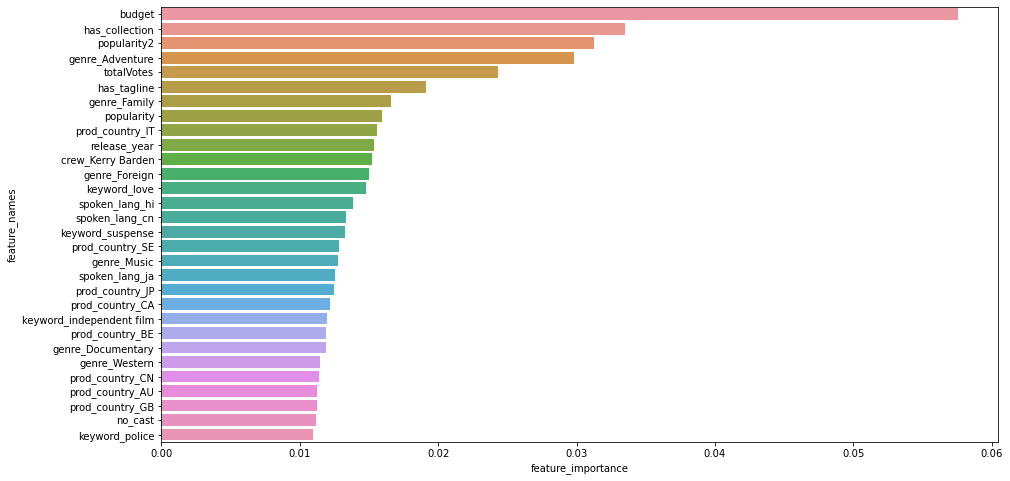

In [613]:
plt.figure(figsize = (15,8))
sns.barplot(x=xgboost_feature_imp_tuning[:30].feature_importance, y=xgboost_feature_imp_tuning[:30].feature_names)

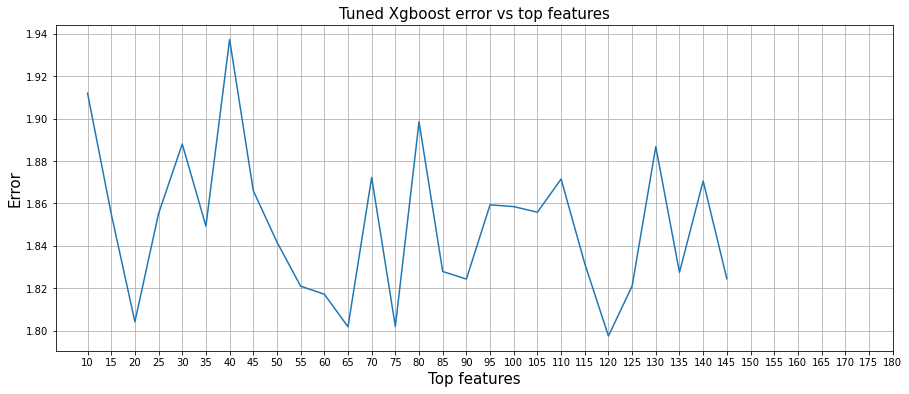

In [614]:
j,k=top_features(xgb_rdcv,xgboost_feature_imp_tuning, 150)
plt.figure(figsize = (15,6))
sns.lineplot(x=j, y=k)
plt.xticks(np.arange(10, X.shape[1], step=5))
plt.grid()
plt.xlabel('Top features',fontsize=15)
plt.ylabel('Error',fontsize=15)
plt.title("Tuned Xgboost error vs top features", fontsize=15)
plt.show()

In [433]:
# predict=xgb_rdcv.predict(X_test)

# predict=np.expm1(predict)

# get_score(y_test,predict)

In [451]:
xgb_rdcv.fit(X[xgboost_feature_imp_tuning[:65].feature_names],y)

xgb_predict_tuning=xgb_rdcv.predict(test[xgboost_feature_imp_tuning[:65].feature_names])
xgb_predict_tuning=np.expm1(xgb_predict_tuning)

In [452]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=xgb_predict_tuning

df.to_csv('xgb_tuning.csv', index=False)
df

,id,revenue
0,3001,6.495230e+06
1,3002,1.203161e+06
2,3003,8.145562e+06
3,3004,1.604008e+07
4,3005,8.776164e+05
...,...,...
4393,7394,4.294644e+07
4394,7395,4.109656e+07
4395,7396,2.649328e+07
4396,7397,2.918699e+07


## Light GBM 

In [ ]:
## without hyperparameter tuning

In [384]:
from lightgbm import LGBMRegressor, plot_importance

In [634]:
lgbm=LGBMRegressor(random_state=42)

lgbm.fit(X_train,y_train)

predict=lgbm.predict(X_test)
predict=np.expm1(predict)

get_score(y_test,predict)

1.881289038244683

In [637]:
lgb_predict=kfold_validation(lgbm, 10)

In [638]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=lgb_predict

df.to_csv('lgbm.csv', index=False)
df

,id,revenue
0,3001,7.228225e+06
1,3002,3.217642e+06
2,3003,1.670918e+07
3,3004,1.621479e+07
4,3005,9.522763e+05
...,...,...
4393,7394,4.112905e+07
4394,7395,4.402332e+07
4395,7396,3.649411e+07
4396,7397,2.041879e+07


In [377]:
# lgbm.feature_importances_

In [378]:
# fig, ax = plt.subplots(figsize=(8, 13))
# plot_importance(lgbm, max_num_features=30, height=0.5, ax=ax)
# pyplot.show()

In [379]:
lgbm_feature_importance = pd.DataFrame({'feature_importance': lgbm.feature_importances_, 
              'feature_names': X.columns}).sort_values(by=['feature_importance'], 
                                                       ascending=False)

In [380]:
lgbm_feature_importance

,feature_importance,feature_names
96,253,release_year
5,243,totalVotes
0,228,budget
2,211,runtime
1,198,popularity
...,...,...
71,0,prod_comp_Dune Entertainment
70,0,prod_comp_BBC Films
69,0,prod_comp_Regency Enterprises
68,0,prod_comp_Village Roadshow Pictures


<AxesSubplot:xlabel='feature_importance', ylabel='feature_names'>

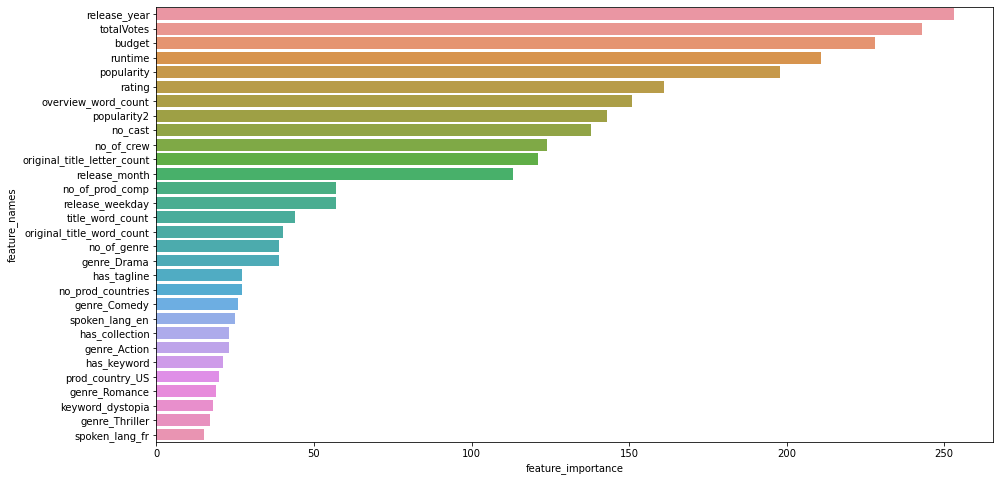

In [381]:
plt.figure(figsize = (15,8))
sns.barplot(x=lgbm_feature_importance[:30].feature_importance, y=lgbm_feature_importance[:30].feature_names)

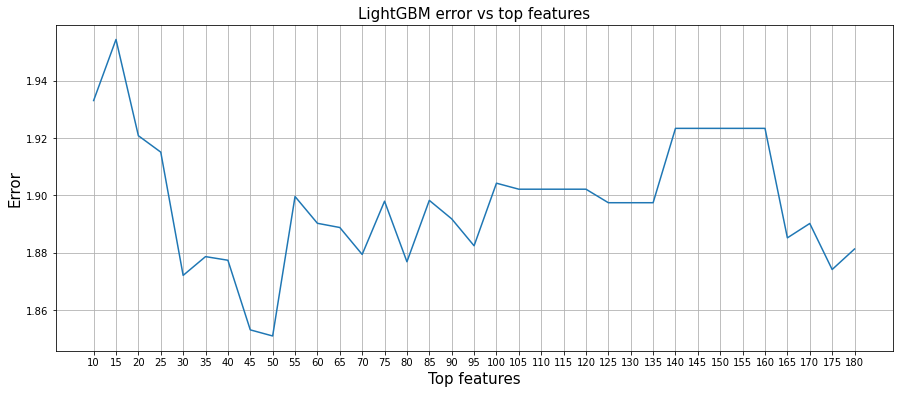

In [382]:
j,k=top_features(lgbm,lgbm_feature_importance, X.shape[1])
plt.figure(figsize = (15,6))
sns.lineplot(x=j, y=k)
plt.xticks(np.arange(10, X.shape[1], step=5))
plt.grid()
plt.xlabel('Top features',fontsize=15)
plt.ylabel('Error',fontsize=15)
plt.title("LightGBM error vs top features", fontsize=15)
plt.show()

In [385]:
lgbm.fit(X[lgbm_feature_importance[:50].feature_names],y)

lgb_predict=lgbm.predict(test[lgbm_feature_importance[:50].feature_names])
lgb_predict=np.expm1(lgb_predict)

In [ ]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=lgb_predict

df.to_csv('lgbm.csv', index=False)
df

In [641]:
lgb_predict=kfold_validation_top_features(lgbm,lgbm_feature_importance,10, 50 )

In [642]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=lgb_predict

df.to_csv('lgbm.csv', index=False)
df

,id,revenue
0,3001,4.836871e+06
1,3002,3.370974e+06
2,3003,2.226121e+07
3,3004,1.664662e+07
4,3005,1.058383e+06
...,...,...
4393,7394,4.235614e+07
4394,7395,4.625341e+07
4395,7396,3.214485e+07
4396,7397,1.825640e+07


In [ ]:
## applying hyperparameter tuning

In [385]:
lgbm = LGBMRegressor()

param_dist = {
    'num_leaves':[25,30,32,35],
    'learning_rate': [0.01,0.1,0.2,0.3],
    'n_estimators': [100,200,300,400,500],
    'max_depth': [5,6,7,8,9,10],
    'subsample': [0.6,0.7,0.8,1.0],
    'colsample_bytree': [0.6,0.7,0.8,1.0], 
    'random_state': [42]
}

lgbm_rdcv = RandomizedSearchCV(lgbm,param_dist, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1)

lgbm_rdcv.fit(X_train, y_train)

lgbm_rdcv.best_params_

{'subsample': 0.8,
 'random_state': 42,
 'num_leaves': 35,
 'n_estimators': 300,
 'max_depth': 5,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8}

In [386]:
predict=lgbm_rdcv.predict(X_test)

predict=np.expm1(predict)

get_score(y_test,predict)

1.8777302453815061

In [ ]:
# lgbm_rdcv.best_estimator_.feature_importances_

In [369]:
lgbm_feature_imp_tuning = pd.DataFrame({'feature_importance': lgbm_rdcv.best_estimator_.feature_importances_, 
              'feature_names': X.columns}).sort_values(by=['feature_importance'], 
                                                       ascending=False)

In [370]:
lgbm_feature_imp_tuning

,feature_importance,feature_names
0,519,budget
5,516,totalVotes
1,459,popularity
2,442,runtime
96,428,release_year
...,...,...
90,0,prod_country_MX
88,0,prod_country_BE
63,0,prod_comp_TriStar Pictures
26,0,collec_Cars Collection


<AxesSubplot:xlabel='feature_importance', ylabel='feature_names'>

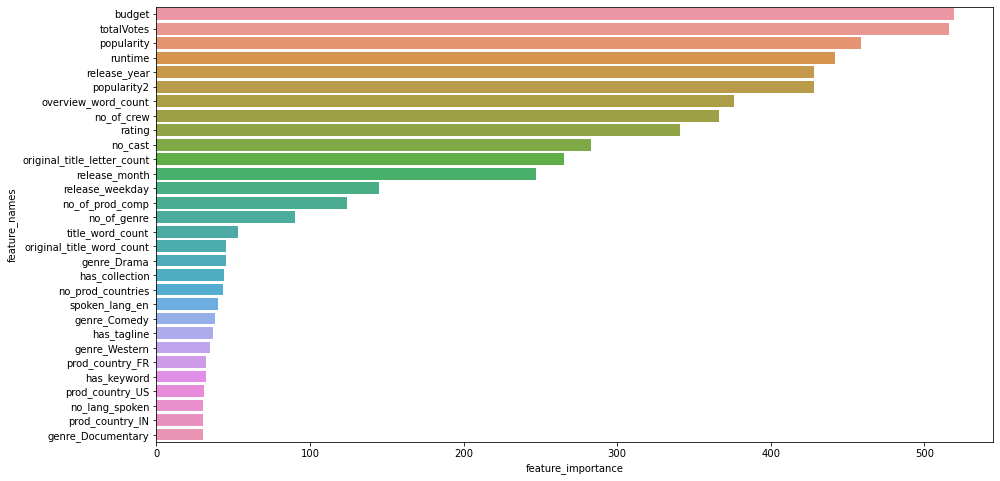

In [371]:
plt.figure(figsize = (15,8))
sns.barplot(x=lgbm_feature_imp_tuning[:30].feature_importance, y=lgbm_feature_imp_tuning[:30].feature_names)

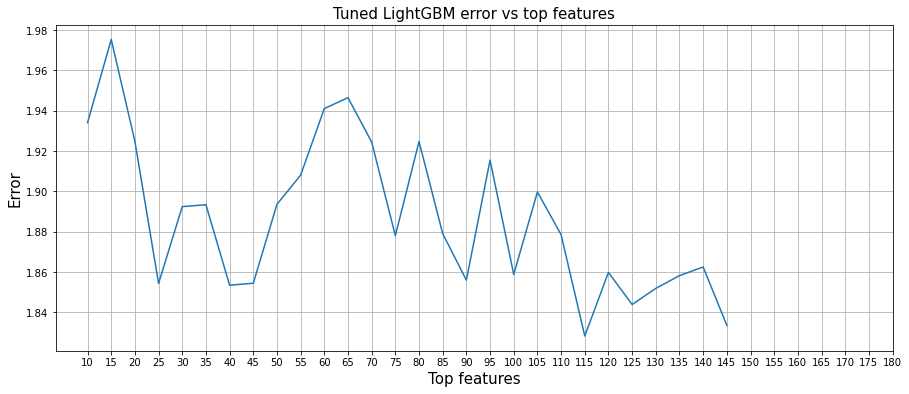

In [415]:
j,k=top_features(lgbm_rdcv,lgbm_feature_imp_tuning, 150)
plt.figure(figsize = (15,6))
sns.lineplot(x=j, y=k)
plt.xticks(np.arange(10, X.shape[1], step=5))
plt.grid()
plt.xlabel('Top features',fontsize=15)
plt.ylabel('Error',fontsize=15)
plt.title("Tuned LightGBM error vs top features", fontsize=15)
plt.show()

In [651]:
lgbm_rdcv.fit(X[lgbm_feature_imp_tuning[:115].feature_names],y)

lgb_predict_tuning=lgbm_rdcv.predict(test[lgbm_feature_imp_tuning[:115].feature_names])
lgb_predict_tuning=np.expm1(lgb_predict_tuning)

In [652]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=lgb_predict_tuning

df.to_csv('lgbm_tuning.csv', index=False)
df

,id,revenue
0,3001,1.246590e+07
1,3002,5.416831e+06
2,3003,1.693640e+07
3,3004,1.240744e+07
4,3005,7.064322e+05
...,...,...
4393,7394,4.223990e+07
4394,7395,5.500828e+07
4395,7396,2.074534e+07
4396,7397,1.887939e+07


In [647]:
lgb_predict_tuning=kfold_validation_top_features(lgbm_rdcv,lgbm_feature_importance,5, 115 )

In [648]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=lgb_predict_tuning

df.to_csv('lgbm_tuning.csv', index=False)
df

,id,revenue
0,3001,8.826495e+06
1,3002,3.767086e+06
2,3003,9.709787e+06
3,3004,1.873701e+07
4,3005,9.945668e+05
...,...,...
4393,7394,4.330932e+07
4394,7395,5.601489e+07
4395,7396,2.923717e+07
4396,7397,2.297196e+07


## Cat Boost

In [387]:
from catboost import CatBoostRegressor

In [388]:
cat=CatBoostRegressor(verbose=False, random_state=42)

cat.fit(X_train,y_train)

predict=cat.predict(X_test)
predict=np.expm1(predict)

get_score(y_test,predict)

1.757507697001601

In [389]:
cat_predict=kfold_validation(cat,50)

In [390]:
# cat.fit(X,y)

# cat_predict=cat.predict(test)
# cat_predict=np.expm1(cat_predict)

In [391]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=cat_predict

df.to_csv('cat.csv', index=False)
df

,id,revenue
0,3001,1.401282e+07
1,3002,1.072271e+06
2,3003,1.002184e+07
3,3004,8.409068e+06
4,3005,6.542108e+05
...,...,...
4393,7394,3.721980e+07
4394,7395,4.354657e+07
4395,7396,3.130975e+07
4396,7397,2.329530e+07


In [396]:
# cat.feature_importances_

In [621]:
cat.get_feature_importance

<bound method CatBoost.get_feature_importance of <catboost.core.CatBoostRegressor object at 0x00000268E8764970>>

In [622]:
cat_feature_importance = pd.DataFrame({'feature_importance': cat.get_feature_importance(), 
              'feature_names': X.columns}).sort_values(by=['feature_importance'], 
                                                       ascending=False)

In [402]:
# train.head(1)

In [401]:
cat_feature_importance

,feature_importance,feature_names
0,27.712004,budget
96,10.372292,release_year
5,9.999632,totalVotes
1,8.214974,popularity
2,4.178270,runtime
...,...,...
151,0.000000,cast_John Turturro
16,0.000000,collec_Alien Collection
15,0.000000,collec_Rambo Collection
157,0.000000,cast_Sylvester Stallone


In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x=cat_fea_imp_df[:30].feature_importance, y=cat_fea_imp_df[:30].feature_names)
# cat_fea_imp_df[:10].sort_values(by=['feature_importance'], ascending=True).plot.barh(x='feature_names', y='feature_importance')
plt.title('CatBoost - Feature Importance')

In [ ]:
# X.shape[1]

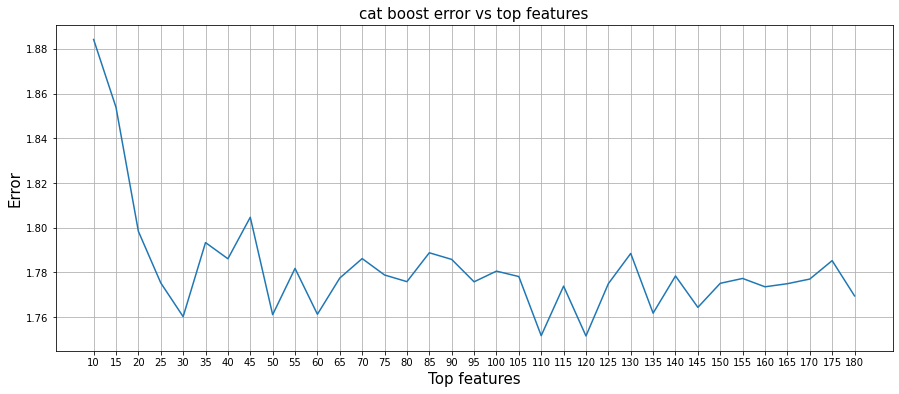

In [404]:
j,k=top_features(cat,cat_feature_importance, X.shape[1])
plt.figure(figsize = (15,6))
sns.lineplot(x=j, y=k)
plt.xticks(np.arange(10, X.shape[1], step=5))
plt.grid()
plt.xlabel('Top features',fontsize=15)
plt.ylabel('Error',fontsize=15)
plt.title("cat boost error vs top features", fontsize=15)
plt.show()

In [625]:
cat.fit(X[cat_fea_imp_df[:150].feature_names],y)

cat_predict=cat.predict(test[cat_fea_imp_df[:150].feature_names])
cat_predict=np.expm1(cat_predict)

In [626]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=cat_predict

df.to_csv('cat.csv', index=False)
df

,id,revenue
0,3001,1.189403e+07
1,3002,1.112991e+06
2,3003,9.047299e+06
3,3004,7.399087e+06
4,3005,6.208312e+05
...,...,...
4393,7394,3.604734e+07
4394,7395,3.787573e+07
4395,7396,3.459618e+07
4396,7397,2.011282e+07


## Combinning different model on the basis of their accuracy

In [ ]:
## xgboost and lightgbm

In [459]:
xgb_lgb=xgb_predict_tuning*0.4 + lgb_predict_tuning*0.6

In [460]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=xgb_lgb

df.to_csv('xgb_lgb.csv', index=False)
df

,id,revenue
0,3001,5.244066e+06
1,3002,1.350136e+06
2,3003,9.120825e+06
3,3004,1.331034e+07
4,3005,7.615099e+05
...,...,...
4393,7394,4.274913e+07
4394,7395,4.183877e+07
4395,7396,2.807057e+07
4396,7397,2.660473e+07


In [ ]:
## xgboost tuning + lightgbm  tuning + cat boost (without tuning)

In [453]:
xgb_lgb_cat= xgb_predict_tuning*0.2 + lgb_predict_tuning*0.2 + cat_predict*0.6

In [454]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=xgb_lgb_cat

df.to_csv('xgb_lgb_cat.csv', index=False)
df

,id,revenue
0,3001,7.280745e+06
1,3002,9.123145e+05
2,3003,1.090385e+07
3,3004,8.614766e+06
4,3005,7.729326e+05
...,...,...
4393,7394,4.009337e+07
4394,7395,3.927978e+07
4395,7396,3.011866e+07
4396,7397,2.742009e+07


In [455]:
xgb_lgb_cat= xgb_predict_tuning*0.2 + lgb_predict_tuning*0.3 + cat_predict*0.5

In [456]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=xgb_lgb_cat

df.to_csv('xgb_lgb_cat.csv', index=False)
df

,id,revenue
0,3001,6.871790e+06
1,3002,9.934501e+05
2,3003,1.066086e+07
3,3004,9.245711e+06
4,3005,7.645784e+05
...,...,...
4393,7394,4.052504e+07
4394,7395,3.974751e+07
4395,7396,2.986494e+07
4396,7397,2.714073e+07


In [ ]:
## lightgbm tuning + catboost

In [457]:
lgb_cat= lgb_predict_tuning*0.4 + cat_predict*0.6

In [458]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=lgb_cat

df.to_csv('lgb_cat.csv', index=False)
df

,id,revenue
0,3001,6.863691e+06
1,3002,9.613064e+05
2,3003,1.122894e+07
3,3004,7.704855e+06
4,3005,7.342304e+05
...,...,...
4393,7394,4.002760e+07
4394,7395,3.952718e+07
4395,7396,3.064442e+07
4396,7397,2.655933e+07


## Result analysis:-

In [403]:
model_name=['LinearRegression','LinearRegression 10 kfold',
            'Decision tree','Decision tree 10kfold',
            'Tuned Decision tree','Tuned Decision tree 10kfold',
            'Randomforest','Randomforest 10kfold','Randomforest top 50 features','Randomforest top 55 features',
            'Tuned Randomforest','Tuned Randomforest top 30 features',
            'Xgboost','Xgboost 10kfold' ,'Xgboost top 65 features',
            'Tuned Xgboost','Tuned Xgboost top 65 features',
            'LightGBM' ,'LightGBM 10kfold','LightGBM top 50 features' ,
            'Tuned LightGBM','Tuned LightGBM top 115 features',
            'cat boost','cat boost top 145 features','cat boost 10kfold','cat boost 20kfold','cat boost 30kfold',
            'xgb+lgb','xgb+lgbm+cat','lgbm+cat', 'catbost 50kfold', 'lgbm+catbost(20kfold)'
            ]

In [404]:
model_score=[2.21912,2.21781,2.54486,2.31245,2.07458,2.09065,1.96613,1.96759,1.97318,1.97051,1.97631,1.97207,1.89565,1.81308,
            1.89388,1.80199,1.78926,1.80057,1.77824,1.78986,1.79003,1.74408,1.72117,1.72899,1.71656,1.71717,1.71551,
             1.74602,1.71766,1.71957,1.71443,1.71486]

In [405]:
result_analyis = pd.DataFrame({'model_score': model_score, 
              'model_name': model_name}).sort_values(by=['model_score'], 
                                                       ascending=True)

Text(0.5, 1.0, 'Model Analysis')

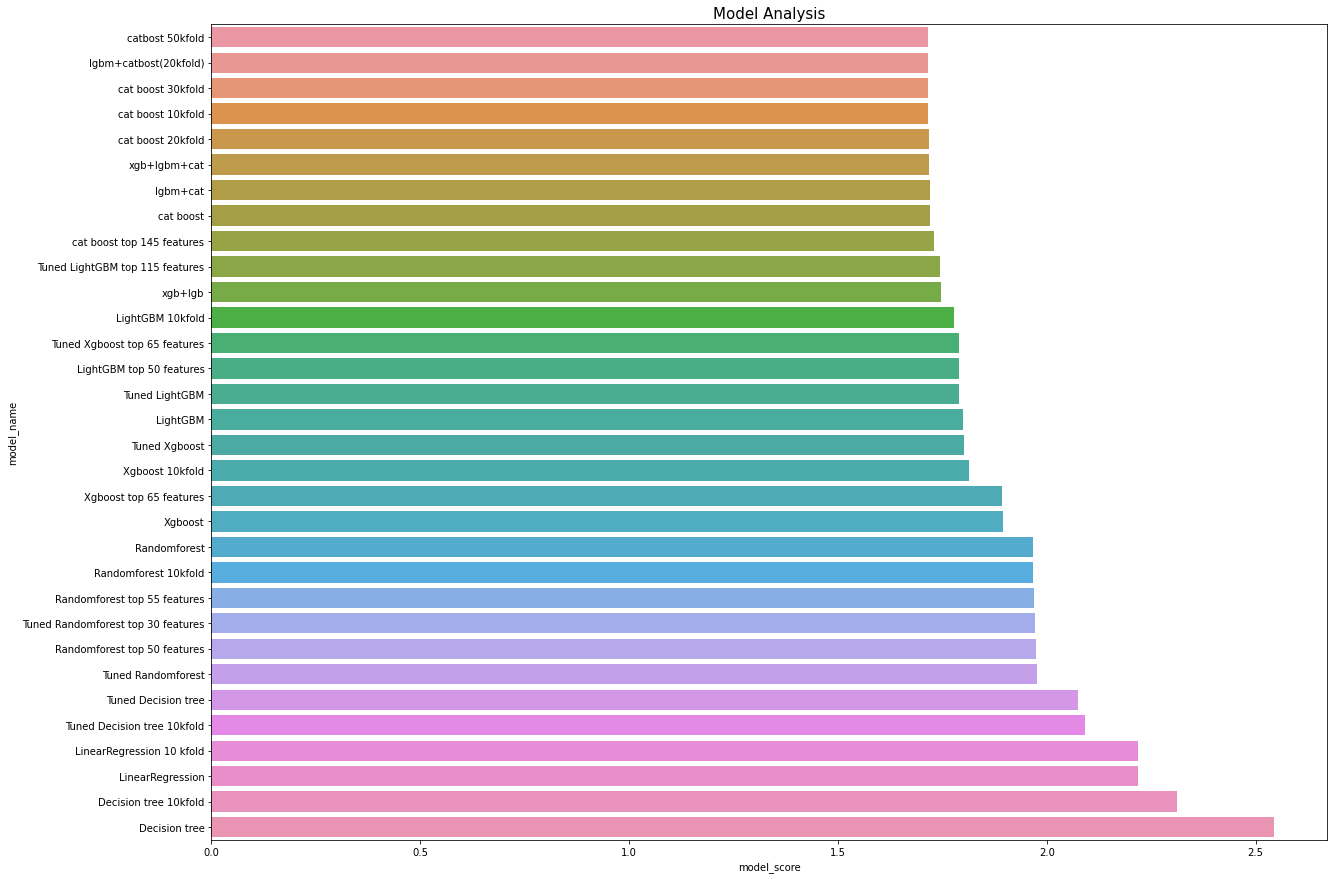

In [406]:
plt.figure(figsize = (20,15))
sns.barplot(x=result_analyis.model_score, y=result_analyis.model_name)
plt.title("Model Analysis", fontsize=15)

In [683]:
## Other ways we can try to improve the model accuracy:- 

we can use features importance for all the model take out the top features and try to fit our data and check our accuracy

do some more hyper-parameter tuning and see the result

we can also try to use that model we has low error and train that model 5-10 times and take the average.

In [382]:
## Any suggestions??